# Data Mining Project | Amazing International Airlines Inc.

In [122]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
from narwhals.stable.v1 import Datetime
from sklearn.cluster import KMeans, HDBSCAN, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import NearestNeighbors
from collections import Counter
import functions as func

## Table of Contents
- [Business Understanding](#business-understanding)
- [Data Understanding](#data-understanding)
  - [Customer Database](#customer-database)
    - [Reading the data](#reading-the-data)
    - [Metadata](#metadata)
    - [Initial Analysis](#initial-analysis)
    - [Data Quality Checks](#data-quality-checks)
  - [Flights Database](#flights-database)
    - [Reading the data](#reading-the-data-1)
    - [Metadata](#metadata-1)
    - [Initial Analysis](#initial-analysis-1)
    - [Data Quality Checks](#data-quality-checks-1)
- [Data Preparation](#data-preparation)
  - [Customers Database](#customers-database)
    - [Data Types](#data-types)
    - [Duplicates](#duplicates)
    - [Missing Values](#missing-values)
    - [Coherence Check](#coherence-check)
  - [Flights Database](#flights-database-1)
    - [Data Types](#data-types-1)
    - [Duplicates](#duplicates-1)
    - [Coherence Check](#coherence-check-1)
    - [Coherence Check on both databases](#coherence-check-on-both-databases)
- [Data Exploration](#data-exploration)
  - [Customer](#customer)
  - [Distributions of Categorical Features](#distributions-of-categorical-features)
  - [Distribution of Numerical Features](#distribution-of-numerical-features)

## Business Understanding

AIAI aims to use customer data to understand their behaviors, with the goal of improving satisfaction, customer value, and profitability. The main challenge is to segment customers based on their travel habits and loyalty, enabling the creation of personalized marketing and optimized services. The project aims to transform these analytical findings into actionable business strategies.

## Data Understanding

### Customer Database

#### Reading the data

In [123]:
customer_data = pd.read_csv("DM_AIAI_CustomerDB.csv",index_col=0)

#### Metadata
- *Loyalty#* - Unique customer identifier for loyalty program members
- *First Name* - Customer's first name
- *Last Name* -	Customer's last name
- *Customer Name* - Customer's full name (concatenated)
- *Country* - Customer's country of residence
- *Province or State* - Customer's province or state
- *City* - Customer's city of residence
- *Latitude* - Geographic latitude coordinate of customer location
- *Longitude* - Geographic longitude coordinate of customer location
- *Postal code* - Customer's postal/ZIP code
- *Gender* - Customer's gender
- *Education* - Customer's highest education level (Bachelor, College, etc.)
- *Location Code*- Urban/Suburban/Rural classification of customer residence
- *Income* - Customer's annual income
- *Marital Status* - Customer's marital status (Married, Single, Divorced)
- *LoyaltyStatus* - Current tier status in loyalty program (Star > Nova > Aurora)
- *EnrollmentDateOpening* - Date when customer joined the loyalty program
- *CancellationDate* - Date when customer left the program
- *Customer Lifetime Value* - Total calculated monetary value of customer relationship
- *EnrollmentType* - Method of joining loyalty program


#### Initial Analysis
General idea of the data structure, column names and types of values each variable contains.

In [124]:
customer = customer_data.copy()
customer.head(3)

Loyalty# First Name    Last Name        Customer Name Country  \
0    480934    Cecilia  Householder  Cecilia Householder  Canada   
1    549612      Dayle        Menez          Dayle Menez  Canada   
2    429460     Necole       Hannon        Necole Hannon  Canada   

  Province or State       City   Latitude   Longitude Postal code  Gender  \
0           Ontario    Toronto  43.653225  -79.383186     M2Z 4K1  female   
1           Alberta   Edmonton  53.544388 -113.490930     T3G 6Y6    male   
2  British Columbia  Vancouver  49.282730 -123.120740     V6E 3D9    male   

  Education Location Code   Income Marital Status LoyaltyStatus  \
0  Bachelor         Urban  70146.0        Married          Star   
1   College         Rural      0.0       Divorced          Star   
2   College         Urban      0.0         Single          Star   

  EnrollmentDateOpening CancellationDate  Customer Lifetime Value  \
0             2/15/2019              NaN                  3839.14   
1              3/9/2019              NaN                  3839.61   
2             7/14/2017         1/8/2021                  3839.75   

  EnrollmentType  
0       Standard  
1       Standard  
2       Standard

In [125]:
print(f"Numbers of lines and columns: {customer.shape}")

Numbers of lines and columns: (16921, 20)


In [126]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16921 entries, 0 to 19
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Loyalty#                 16921 non-null  int64  
 1   First Name               16921 non-null  object 
 2   Last Name                16921 non-null  object 
 3   Customer Name            16921 non-null  object 
 4   Country                  16921 non-null  object 
 5   Province or State        16921 non-null  object 
 6   City                     16921 non-null  object 
 7   Latitude                 16921 non-null  float64
 8   Longitude                16921 non-null  float64
 9   Postal code              16921 non-null  object 
 10  Gender                   16921 non-null  object 
 11  Education                16921 non-null  object 
 12  Location Code            16921 non-null  object 
 13  Income                   16901 non-null  float64
 14  Marital Status           16921

In [127]:
customer.describe(include="all").T

count unique          top   freq           mean  \
Loyalty#                 16921.0    NaN          NaN    NaN  550197.393771   
First Name                 16921   4941       Stacey     13            NaN   
Last Name                  16921  15404        Ypina      4            NaN   
Customer Name              16921  16921  Emma Martin      1            NaN   
Country                    16921      1       Canada  16921            NaN   
Province or State          16921     11      Ontario   5468            NaN   
City                       16921     29      Toronto   3390            NaN   
Latitude                 16921.0    NaN          NaN    NaN        47.1745   
Longitude                16921.0    NaN          NaN    NaN     -91.814768   
Postal code                16921     75      V6E 3D9    917            NaN   
Gender                     16921      2       female   8497            NaN   
Education                  16921      5     Bachelor  10586            NaN   
Location Code              16921      3     Suburban   5716            NaN   
Income                   16901.0    NaN          NaN    NaN     37758.0384   
Marital Status             16921      3      Married   9842            NaN   
LoyaltyStatus              16921      3         Star   7761            NaN   
EnrollmentDateOpening      16921   2449     4/3/2015     34            NaN   
CancellationDate            2310   1260     7/7/2020      8            NaN   
Customer Lifetime Value  16901.0    NaN          NaN    NaN    7990.460188   
EnrollmentType             16921      2     Standard  15773            NaN   

                                   std        min        25%        50%  \
Loyalty#                 259251.503597   100011.0   326823.0   550896.0   
First Name                         NaN        NaN        NaN        NaN   
Last Name                          NaN        NaN        NaN        NaN   
Customer Name                      NaN        NaN        NaN        NaN   
Country                            NaN        NaN        NaN        NaN   
Province or State                  NaN        NaN        NaN        NaN   
City                               NaN        NaN        NaN        NaN   
Latitude                      3.307971  42.984924  44.231171  46.087818   
Longitude                    22.242429 -135.05684 -120.23766 -79.383186   
Postal code                        NaN        NaN        NaN        NaN   
Gender                             NaN        NaN        NaN        NaN   
Education                          NaN        NaN        NaN        NaN   
Location Code                      NaN        NaN        NaN        NaN   
Income                    30368.992499        0.0        0.0    34161.0   
Marital Status                     NaN        NaN        NaN        NaN   
LoyaltyStatus                      NaN        NaN        NaN        NaN   
EnrollmentDateOpening              NaN        NaN        NaN        NaN   
CancellationDate                   NaN        NaN        NaN        NaN   
Customer Lifetime Value    6863.173093    1898.01    3979.72    5780.18   
EnrollmentType                     NaN        NaN        NaN        NaN   

                               75%        max  
Loyalty#                  772438.0   999999.0  
First Name                     NaN        NaN  
Last Name                      NaN        NaN  
Customer Name                  NaN        NaN  
Country                        NaN        NaN  
Province or State              NaN        NaN  
City                           NaN        NaN  
Latitude                  49.28273  60.721188  
Longitude               -74.596184 -52.712578  
Postal code                    NaN        NaN  
Gender                         NaN        NaN  
Education                      NaN        NaN  
Location Code                  NaN        NaN  
Income                     62396.0    99981.0  
Marital Status                 NaN        NaN  
LoyaltyStatus                  NaN        Na

#### Data Quality Checks

In [128]:
customer.replace("", np.nan, inplace=True)
customer.isna().sum()

Loyalty#                       0
First Name                     0
Last Name                      0
Customer Name                  0
Country                        0
Province or State              0
City                           0
Latitude                       0
Longitude                      0
Postal code                    0
Gender                         0
Education                      0
Location Code                  0
Income                        20
Marital Status                 0
LoyaltyStatus                  0
EnrollmentDateOpening          0
CancellationDate           14611
Customer Lifetime Value       20
EnrollmentType                 0
dtype: int64

We have 20 customers without income data, 20 customers without Customer Lifetime Value data and 14611 customers without CancellationDate data.

In [129]:
customer.duplicated().sum()

np.int64(0)

We have no duplicated rows in our data.

### Flights Database

#### Reading the data

In [130]:
flight_data = pd.read_csv("DM_AIAI_FlightsDB.csv")

#### Metadata
- *Variable* - Description
- *Loyalty#* - Unique customer identifier linking to CustomerDB
- *Year* -	Year of flight activity record
- *Month* - Month of flight activity record (1-12)
- *YearMonthDate* - First day of the month for the activity period
- *NumFlights* - Total number of flights taken by customer in the month
- *NumFlightsWithCompanions* - Number of flights where customer traveled with companions
- *DistanceKM* - Total distance traveled in kilometers for the month
- *PointsAccumulated* - Loyalty points earned by customer during the month
- *PointsRedeemed* - Loyalty points spent/redeemed by customer during the month
- *DollarCostPointsRedeemed* - Dollar value of points redeemed during the month

#### Initial Analysis

General idea of the data structure, column names and types of values each variable contains.

In [131]:
flight = flight_data.copy()
flight.head(3)

Loyalty#  Year  Month YearMonthDate  NumFlights  NumFlightsWithCompanions  \
0    413052  2021     12     12/1/2021         2.0                       2.0   
1    464105  2021     12     12/1/2021         0.0                       0.0   
2    681785  2021     12     12/1/2021        10.0                       3.0   

   DistanceKM  PointsAccumulated  PointsRedeemed  DollarCostPointsRedeemed  
0      9384.0              938.0             0.0                       0.0  
1         0.0                0.0             0.0                       0.0  
2     14745.0             1474.0             0.0                       0.0

In [132]:
print(f"Numbers of lines and columns: {flight.shape}")

Numbers of lines and columns: (608436, 10)


In [133]:
flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 608436 entries, 0 to 608435
Data columns (total 10 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Loyalty#                  608436 non-null  int64  
 1   Year                      608436 non-null  int64  
 2   Month                     608436 non-null  int64  
 3   YearMonthDate             608436 non-null  object 
 4   NumFlights                608436 non-null  float64
 5   NumFlightsWithCompanions  608436 non-null  float64
 6   DistanceKM                608436 non-null  float64
 7   PointsAccumulated         608436 non-null  float64
 8   PointsRedeemed            608436 non-null  float64
 9   DollarCostPointsRedeemed  608436 non-null  float64
dtypes: float64(6), int64(3), object(1)
memory usage: 46.4+ MB


In [134]:
flight.describe(include="all").T

count unique        top   freq           mean  \
Loyalty#                  608436.0    NaN        NaN    NaN  550037.873084   
Year                      608436.0    NaN        NaN    NaN         2020.0   
Month                     608436.0    NaN        NaN    NaN            6.5   
YearMonthDate               608436     36  12/1/2021  16901            NaN   
NumFlights                608436.0    NaN        NaN    NaN       3.908107   
NumFlightsWithCompanions  608436.0    NaN        NaN    NaN       0.983944   
DistanceKM                608436.0    NaN        NaN    NaN    7939.341419   
PointsAccumulated         608436.0    NaN        NaN    NaN     793.777781   
PointsRedeemed            608436.0    NaN        NaN    NaN     235.251678   
DollarCostPointsRedeemed  608436.0    NaN        NaN    NaN       2.324835   

                                    std       min       25%       50%  \
Loyalty#                  258935.180575  100018.0  326961.0  550834.0   
Year                           0.816497    2019.0    2019.0    2020.0   
Month                          3.452055       1.0      3.75       6.5   
YearMonthDate                       NaN       NaN       NaN       NaN   
NumFlights                     5.057889       0.0       0.0       0.0   
NumFlightsWithCompanions       2.003785       0.0       0.0       0.0   
DistanceKM                 10260.421873       0.0       0.0     856.4   
PointsAccumulated           1025.918521       0.0       0.0    85.275   
PointsRedeemed               983.233374       0.0       0.0       0.0   
DollarCostPointsRedeemed       9.725168       0.0       0.0       0.0   

                                75%       max  
Loyalty#                   772194.0  999986.0  
Year                         2021.0    2021.0  
Month                          9.25      12.0  
YearMonthDate                   NaN       NaN  
NumFlights                      7.2      21.0  
NumFlightsWithCompanions        0.9      11.0  
DistanceKM                15338.175   42040.0  
PointsAccumulated         1533.7125    4204.0  
PointsRedeemed                  0.0    7496.0  
DollarCostPointsRedeemed        0.0      74.0

#### Data Quality Checks

In [135]:
flight.replace("", np.nan, inplace=True)
flight.isna().sum()

Loyalty#                    0
Year                        0
Month                       0
YearMonthDate               0
NumFlights                  0
NumFlightsWithCompanions    0
DistanceKM                  0
PointsAccumulated           0
PointsRedeemed              0
DollarCostPointsRedeemed    0
dtype: int64

We have no missing data.

In [136]:
flight.duplicated().sum()

np.int64(2903)

We have 2903 duplicated rowns in our data, that we will look at later.

## Data Preparation

### Customers Database

#### Data Types

In [137]:
customer.dtypes

Loyalty#                     int64
First Name                  object
Last Name                   object
Customer Name               object
Country                     object
Province or State           object
City                        object
Latitude                   float64
Longitude                  float64
Postal code                 object
Gender                      object
Education                   object
Location Code               object
Income                     float64
Marital Status              object
LoyaltyStatus               object
EnrollmentDateOpening       object
CancellationDate            object
Customer Lifetime Value    float64
EnrollmentType              object
dtype: object

The Enrollment Date Opening and Cancellation Dates can be converted to datetime type.

In [138]:
customer["EnrollmentDateOpening"] = pd.to_datetime(customer["EnrollmentDateOpening"])
customer["CancellationDate"] = pd.to_datetime(customer["CancellationDate"], errors="coerce")

#### Duplicates

To use the 'Loyalty#' column as the dataframe's index, it was essential to first confirm that it contained only unique values. An index acts as a primary key for data retrieval, and duplicate entries would make this unreliable.

Upon inspection, some 'Loyalty#' IDs were found to be duplicated. Since there was no clear way to determine which entry represented the true customer record (the "source of truth"), the most robust decision was to remove all records associated with these ambiguous IDs. This data cleansing step ensures the integrity of the dataset, leaving only customers with a single, unique 'Loyalty#' identifier, which can now be reliably set as the index.

In [139]:
duplicated_loyalty = customer_data.duplicated(subset=['Loyalty#'], keep=False)
duplicated_loyalty_list = customer_data[duplicated_loyalty]['Loyalty#'].unique()
print(f"Duplicated Loyaltys {len(duplicated_loyalty_list)}")
customer = customer[customer['Loyalty#'].isin(duplicated_loyalty_list) == False]
print(f"For the initial customer data we have {len(customer_data)} records.\n"
      f"We identified {len(duplicated_loyalty_list)} 'Loyalty#' IDs that were duplicated or appears repeatedly.\n"
      f"So the final len of the data set is {len(customer)}.")

Duplicated Loyaltys 163
For the initial customer data we have 16921 records.
We identified 163 'Loyalty#' IDs that were duplicated or appears repeatedly.
So the final len of the data set is 16594.


In [140]:
customer.set_index("Loyalty#", inplace=True)

#### Missing Values

In [141]:
customer[customer["Income"].isna()].tail(3)

First Name Last Name    Customer Name Country Province or State  \
Loyalty#                                                                   
100014       Amelia   Bennett   Amelia Bennett  Canada     New Brunswick   
100015     Benjamin    Wilson  Benjamin Wilson  Canada            Quebec   
100016         Emma    Martin      Emma Martin  Canada  British Columbia   

                  City   Latitude   Longitude Postal code  Gender Education  \
Loyalty#                                                                      
100014         Moncton  46.051866  -64.825428     G2S 2B6    male  Bachelor   
100015     Quebec City  46.862970  -71.133444     B1Z 8T3  female   College   
100016    Dawson Creek  55.720562 -120.160090     M4A 1E4  female    Master   

         Location Code  Income Marital Status LoyaltyStatus  \
Loyalty#                                                      
100014           Rural     NaN        Married          Star   
100015           Urban     NaN        Married          Star   
100016        Suburban     NaN         Single          Star   

         EnrollmentDateOpening CancellationDate  Customer Lifetime Value  \
Loyalty#                                                                   
100014              2020-11-28       2020-11-28                      NaN   
100015              2020-04-09       2020-04-09                      NaN   
100016              2020-07-21       2020-07-21                      NaN   

         EnrollmentType  
Loyalty#                 
100014         Standard  
100015         Standard  
100016         Standard

The customers with missing income information also have a Customer Lifetime Value equal to 0, which we believe is because their cancellation date is the same as their enrollment date, and it has no value for the company.

In [142]:
customer_NaN_income = customer["Income"].isna().mean() * 100
print(f"The percentage of customers with missing data about income is {customer_NaN_income:.2f} %.")

The percentage of customers with missing data about income is 0.12 %.


Because the percentage of missing data about income is 0.12 %, it is safe to remove this rows.

In [143]:
customer = customer.dropna(subset=['Income'])


#### Coherence Check

In [144]:
# Number of customers with available values in cancellation date
total_cancel_dates = len(customer[customer["CancellationDate"].notna()])
print(f"Number of available cancellation dates: {total_cancel_dates} ({((total_cancel_dates/len(customer))*100):.2f}%)")

Number of available cancellation dates: 2245 (13.55%)


Missing values in the CancellationDate column (which affects 86.45% of the customer base) are assumed to represent customers who have never officially terminated their loyalty membership. 

In [145]:
# Number of customers with cancelation date before the enrollment date
incoherent_cancel_dates = len(customer[customer['CancellationDate'] < customer['EnrollmentDateOpening']])
print(f"Number of incoherent dates: {incoherent_cancel_dates} ({((incoherent_cancel_dates/total_cancel_dates)*100):.2f}%)")

Number of incoherent dates: 199 (8.86%)


The 199 incoherent dates (CancellationDate < EnrollmentDateOpening) strongly suggest a business scenario where members re-enrolled in the loyalty program. It is possible that the CancellationDate reflects an old membership end,  while EnrollmentDateOpening records the start of their current re-activated membership.

This group represents a valuable segment of returned customers,  which we should give special attention during the segmentation phase. 

In [146]:
# Number of incoherent enrollment type 
cust_2021_promo = customer[customer["EnrollmentType"] == "2021 Promotion"].copy()
cust_2021_promo["EnrollmentYear"] = cust_2021_promo["EnrollmentDateOpening"].dt.year
incoherent_enrollment_type = cust_2021_promo[cust_2021_promo["EnrollmentYear"] !=2021.0]
print(f"Number of incoherent enrollment type (enrollment out of 2021): {len(incoherent_enrollment_type)}")

Number of incoherent enrollment type (enrollment out of 2021): 172


This check was performed to verify if the categorical feature "2021 Promotion" in EnrollmentType was chronologically coherent with the customer's EnrollmentDateOpening. The result shows that 172 of customers tagged with the "2021 Promotion" were registered in earlier years (2015, 2017,...).

The EnrollmentType variable remains useful for demographic/psychographic segmentation (identifying customers sensitive to incentives), but its value cannot be strictly relied upon for calculating customer longevity.

In [147]:
# Number of customer's names that don´t correspond to concatenation of first name and last name
coherent_names = ( customer["First Name"].str.strip()+" "+customer["Last Name"].str.strip())
incoherent_names_condition = (customer["Customer Name"].str.strip() != coherent_names.str.strip())
incoherent_names = customer[incoherent_names_condition]
print(f"Number of unmatched customer names: {len(incoherent_names)}")

Number of unmatched customer names: 0


Furthermore, comparing Customer Name against the concatenation of First Name and Last Name confirmed zero inconsistencies, demonstrating the perfect integrity of the customer identification fields.

### Flights Database

#### Data Types

In [148]:
flight.dtypes

Loyalty#                      int64
Year                          int64
Month                         int64
YearMonthDate                object
NumFlights                  float64
NumFlightsWithCompanions    float64
DistanceKM                  float64
PointsAccumulated           float64
PointsRedeemed              float64
DollarCostPointsRedeemed    float64
dtype: object

We decided to change the data types of variables NumFlights, NumFlightsWithCompanions, PointsAccumulated and PointsRedeemed to integers because these variables are discrete.
Also, the YearMonthDate variable can be converted to datetime type.

In [149]:
flight['YearMonthDate'] = pd.to_datetime(flight['YearMonthDate'], errors='coerce')

columns_to_convert = ["NumFlights", "NumFlightsWithCompanions", "PointsAccumulated", "PointsRedeemed"]
flight[columns_to_convert] = flight[columns_to_convert].astype(int)
print(flight[columns_to_convert].dtypes)

NumFlights                  int64
NumFlightsWithCompanions    int64
PointsAccumulated           int64
PointsRedeemed              int64
dtype: object


#### Duplicates

Following the removal of ambiguous 'Loyalty#' IDs from the customer dataset, the same filtering was applied to the flight dataset. This step was crucial for maintaining referential integrity, as it ensures that the flight data only contains records for customers who are verifiably present in the customer data.

In [150]:
flight = flight[flight['Loyalty#'].isin(duplicated_loyalty_list) == False]

In [151]:
flight.duplicated().sum()

np.int64(0)

Interestingly, this action also resolved all duplicate issues within the flight dataset, indicating that the duplicated entries were tied to the same problematic 'Loyalty#' IDs. This clean-up ensures both datasets are now consistent and aligned.

#### Coherence Check

In [152]:
# Number of flights uncoherent
print(f"Number of uncoherent number of flights: {len(flight[flight["NumFlightsWithCompanions"] > flight["NumFlights"]])}")

# Number of flights with uncoherent data of DistanceKM
print(f"Number of uncoherent number of KMs: {len(flight[flight["DistanceKM"] < flight["NumFlights"]])}")

# Number of points accumulated with 0 KM travelled
incoherent_points_condition = (flight["PointsAccumulated"] >0) & (flight["DistanceKM"] == 0)
incoherent_points = flight[incoherent_points_condition]
print(f"Number of incoherent points accumulated: {len(incoherent_points)}")

# Number of incoherent points redeemed or dollar cost points redeemed
incoherent_dollars_condition = (flight["PointsRedeemed"]>0) & (flight["DollarCostPointsRedeemed"]==0) | (flight["PointsRedeemed"]==0) & (flight["DollarCostPointsRedeemed"]>0)
incoherent_dollars = flight[incoherent_dollars_condition]
print(f"Number of incoherent dollars redeemed: {len(incoherent_dollars)}")

Number of uncoherent number of flights: 0
Number of uncoherent number of KMs: 0
Number of incoherent points accumulated: 0
Number of incoherent dollars redeemed: 0


The flight activity data demonstrates high internal coherence, with zero records showing logical inconsistencies between flight counts, distance traveled, point accumulation and dollar cost of points redeemed.

#### Coherence Check on both databases

In [153]:
# Number of incoherent customers flying after customer cancelling the membership
cust_cancelled = customer[customer["CancellationDate"].notna()].copy()

merged_flights_cust_cancel = pd.merge(
    customer[customer["CancellationDate"].notna()][["CancellationDate", "EnrollmentDateOpening"]],
    flight[["Loyalty#", "YearMonthDate", "NumFlights"]],
    left_index=True, right_on= "Loyalty#", how="inner"
)

flights_condition1 = (
    (merged_flights_cust_cancel["YearMonthDate"]> merged_flights_cust_cancel["CancellationDate"]) &
    (merged_flights_cust_cancel["NumFlights"]>0) &
    (merged_flights_cust_cancel["EnrollmentDateOpening"]<=merged_flights_cust_cancel["CancellationDate"])
)

flights1 = merged_flights_cust_cancel[flights_condition1]
print(f"Number of incoherent customers flying after customer cancelling the membership: {flights1["Loyalty#"].nunique()}")

Number of incoherent customers flying after customer cancelling the membership: 0


This test verified if any customer registered flight activity after their official cancellation date without having subsequently re-enrolled in the loyalty program. The results showed zero unique customers exhibiting this true logical incoherence. The previously observed post-cancellation activity is fully justified by customer re-enrollment, meaning the old CancellationDate simply serves as a historical record rather than a current status flag.

In [154]:
customer["CancellationDate"] = customer["CancellationDate"].fillna(pd.Timestamp("1904-01-01"))

dizer que agora sim mudamos o type do cancellation date 

## Data Exploration

#### Customer

### Distributions of Categorical Features

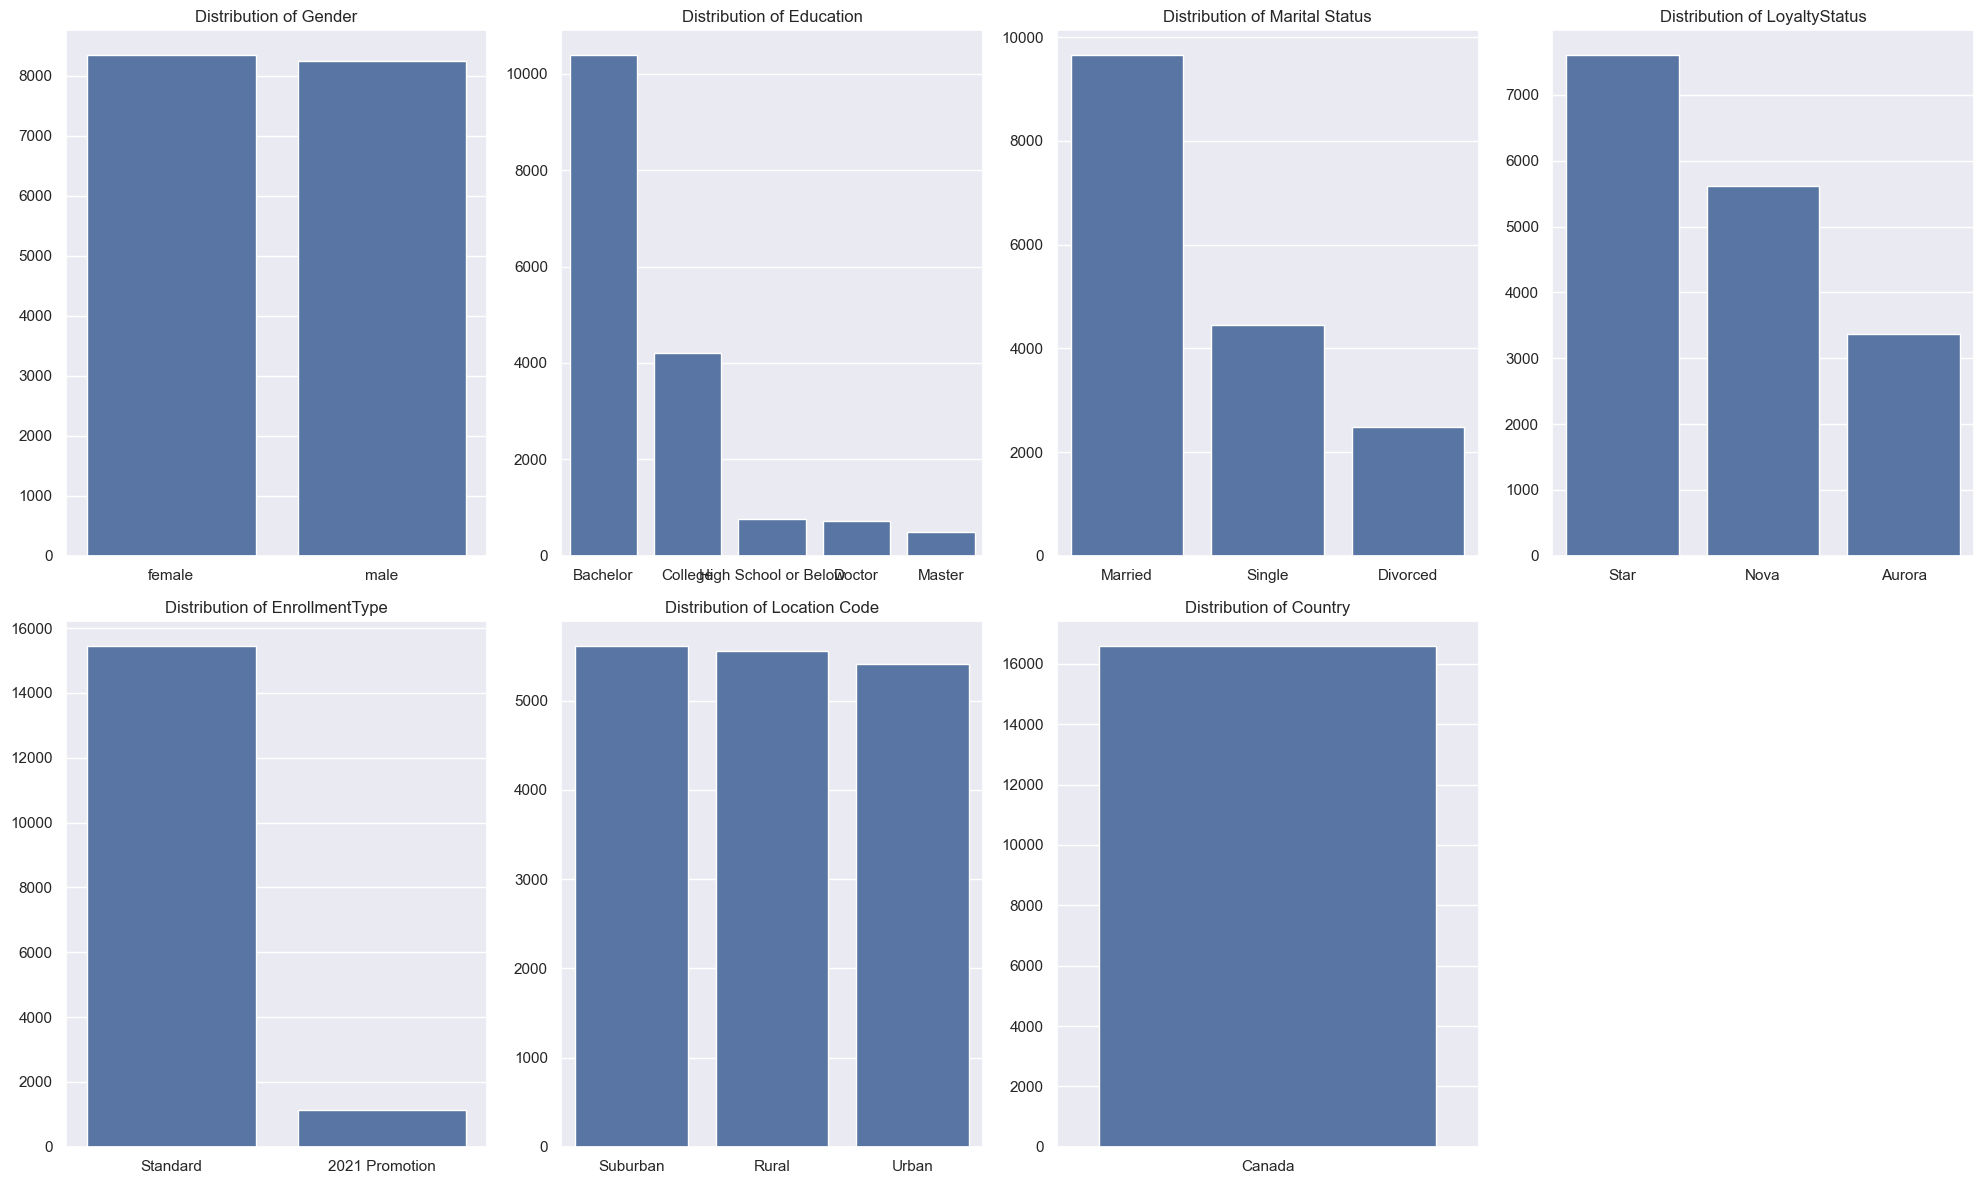

In [155]:

categorical_customer = ["Gender", "Education", "Marital Status", "LoyaltyStatus", "EnrollmentType", "Location Code","Country"]

plt.figure(figsize=(20, 12))
for i, col in enumerate(categorical_customer, 1):
    plt.subplot(2, 4, i)
    sns.countplot(x=col, data=customer, order=customer[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xlabel("")
    plt.ylabel("")
plt.tight_layout()
plt.show()


From these visualizations, we observe that the dataset shows no meaningful variation in gender or location type, suggesting that these variables may have limited discriminative power for segmentation.
Regarding education, the majority of loyalty members hold a Bachelor’s degree, followed by those with College-level education.
In terms of marital status, most customers are married, which may indicate a stable and mature demographic segment.
The loyalty status distribution reveals that most clients belong to the Star tier, followed by Nova and Aurora, highlighting a concentration in mid-level membership.
Finally, the enrollment type indicates that the majority of customers joined through the Standard enrollment process, which could suggest limited participation in promotional or referral programs.


### Distribution of Numerical Features

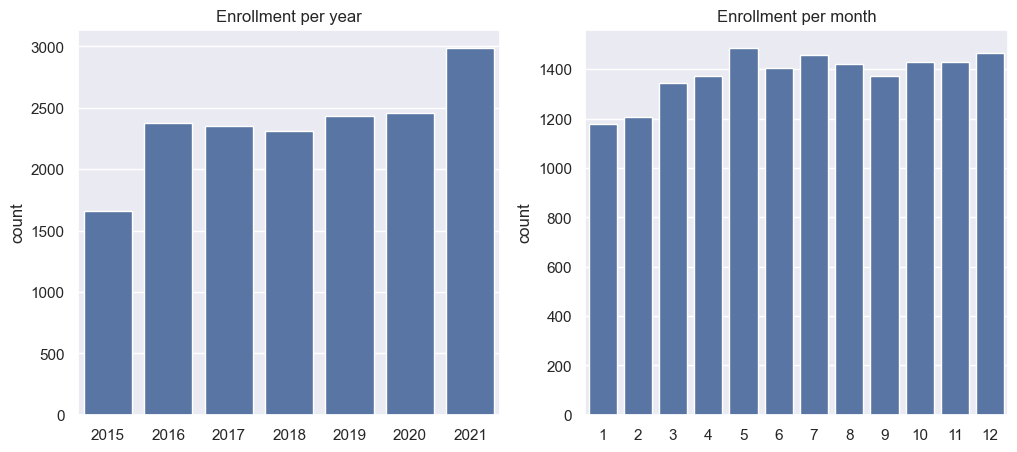

First Name    Last Name        Customer Name Country  \
Loyalty#                                                        
480934      Cecilia  Householder  Cecilia Householder  Canada   
549612        Dayle        Menez          Dayle Menez  Canada   
429460       Necole       Hannon        Necole Hannon  Canada   

         Province or State       City   Latitude   Longitude Postal code  \
Loyalty#                                                                   
480934             Ontario    Toronto  43.653225  -79.383186     M2Z 4K1   
549612             Alberta   Edmonton  53.544388 -113.490930     T3G 6Y6   
429460    British Columbia  Vancouver  49.282730 -123.120740     V6E 3D9   

          Gender Education Location Code   Income Marital Status  \
Loyalty#                                                           
480934    female  Bachelor         Urban  70146.0        Married   
549612      male   College         Rural      0.0       Divorced   
429460      male   College         Urban      0.0         Single   

         LoyaltyStatus EnrollmentDateOpening CancellationDate  \
Loyalty#                                                        
480934            Star            2019-02-15       1904-01-01   
549612            Star            2019-03-09       1904-01-01   
429460            Star            2017-07-14       2021-01-08   

          Customer Lifetime Value EnrollmentType  
Loyalty#                                          
480934                    3839.14       Standard  
549612                    3839.61       Standard  
429460                    3839.75       Standard

In [156]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.countplot(x=customer["EnrollmentDateOpening"].dt.year, data=customer)
plt.title("Enrollment per year")
plt.xlabel("")

plt.subplot(1, 2, 2)
sns.countplot(x=customer["EnrollmentDateOpening"].dt.month, data=customer)
plt.title("Enrollment per month")
plt.xlabel("")
plt.show()
customer.head(3)

The analysis of enrollment trends shows a stable customer acquisition rate between 2016 and 2020, followed by a significant surge in 2021, which represents the highest volume of new enrollments within the dataset. This latest growth suggests successful recent marketing or promotional efforts and indicates a healthy expansion of the customer base. 2021 Promotion

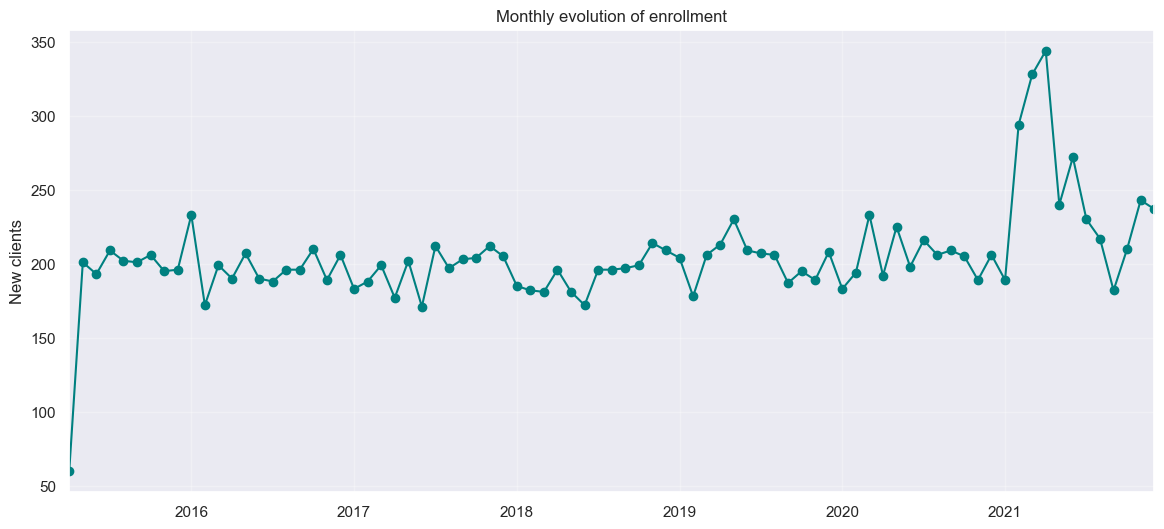

In [157]:
monthly_enrollments = customer.groupby(customer["EnrollmentDateOpening"].dt.to_period("M")).size().sort_index()
# converter índice PeriodIndex para timestamp para plot ficar com labels de datas
monthly_enrollments.index = monthly_enrollments.index.to_timestamp()

plt.figure(figsize=(14, 6))
monthly_enrollments.plot(kind='line', marker='o', color='teal')
plt.title("Monthly evolution of enrollment")
plt.xlabel("")
plt.ylabel("New clients")
plt.grid(True, alpha=0.3)
plt.show()

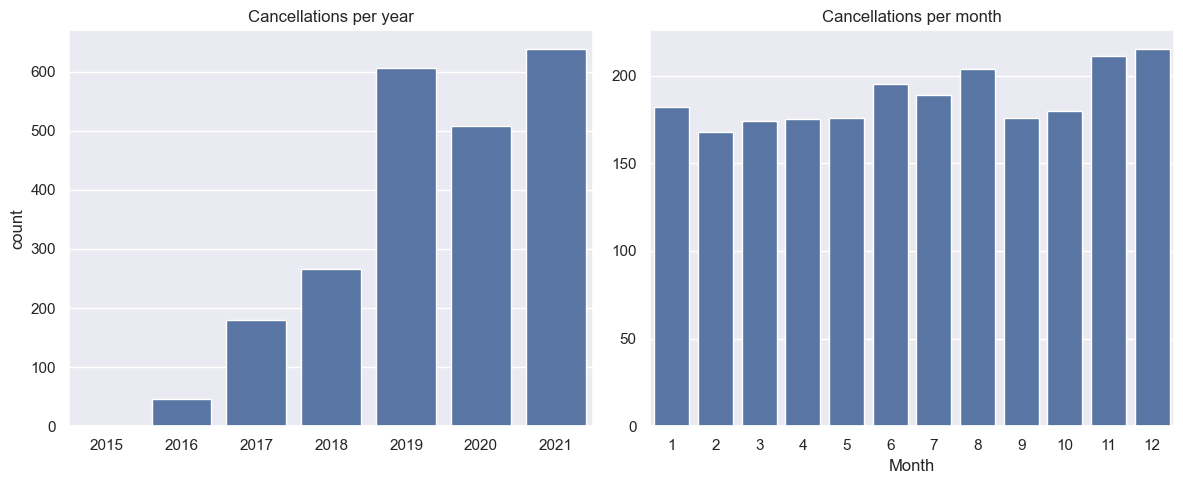

In [158]:

valid_dates = customer["CancellationDate"].dt.year != 1904


plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.countplot(x=customer.loc[valid_dates, "CancellationDate"].dt.year.astype(int).sort_values())
plt.title("Cancellations per year")
plt.xlabel("")

plt.subplot(1,2,2)
sns.countplot(x=customer.loc[valid_dates, "CancellationDate"].dt.month.astype(int))
plt.title("Cancellations per month")
plt.xlabel("Month")
plt.ylabel("")
plt.tight_layout()

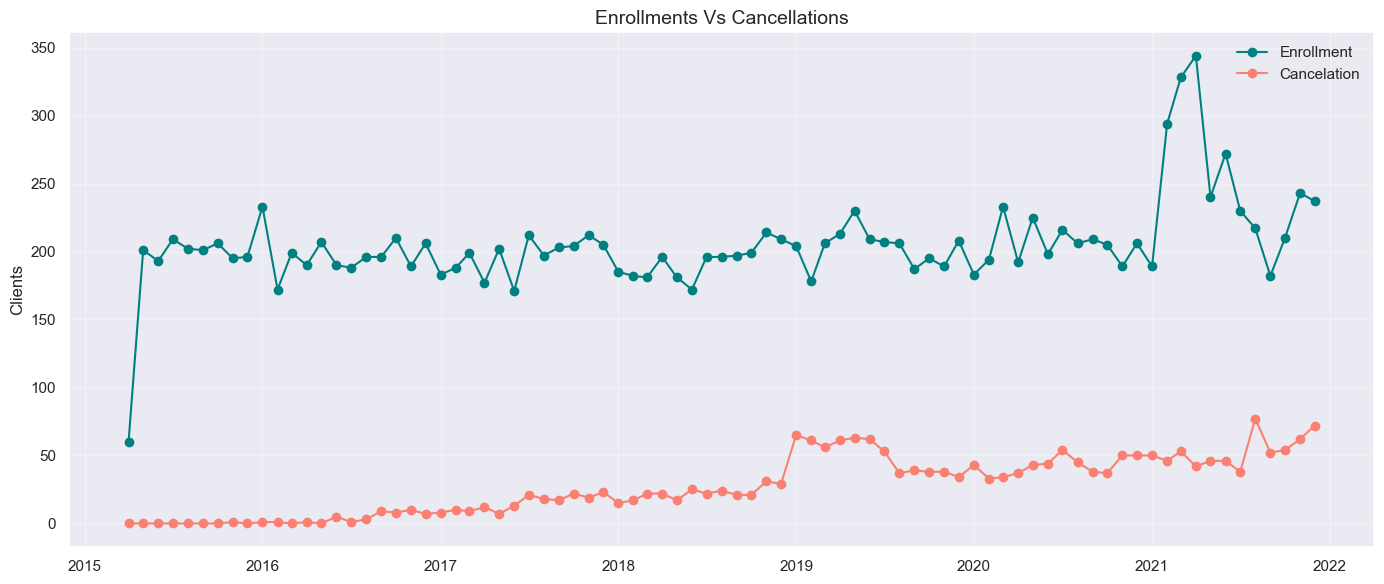

In [159]:
monthly_enroll = customer.groupby(customer["EnrollmentDateOpening"].dt.to_period("M")).size()
monthly_cancel = customer.loc[valid_dates].groupby(customer.loc[valid_dates, "CancellationDate"].dt.to_period("M")).size()

# Criar range completo de meses para alinhar as séries
all_months = pd.period_range(
    start=min(monthly_enroll.index.min(), monthly_cancel.index.min()),
    end=max(monthly_enroll.index.max(), monthly_cancel.index.max()),
    freq="M"
)

# Reindexar para garantir continuidade
monthly_enroll = monthly_enroll.reindex(all_months, fill_value=0)
monthly_cancel = monthly_cancel.reindex(all_months, fill_value=0)

# Converter PeriodIndex em datetime (para eixo legível)
monthly_enroll.index = monthly_enroll.index.to_timestamp()
monthly_cancel.index = monthly_cancel.index.to_timestamp()

plt.figure(figsize=(14,6))
plt.plot(monthly_enroll.index, monthly_enroll, marker='o', label="Enrollment", color='teal')
plt.plot(monthly_cancel.index, monthly_cancel, marker='o', label="Cancelation", color='salmon')
plt.title("Enrollments Vs Cancellations", fontsize=14)
plt.xlabel("")
plt.ylabel("Clients")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


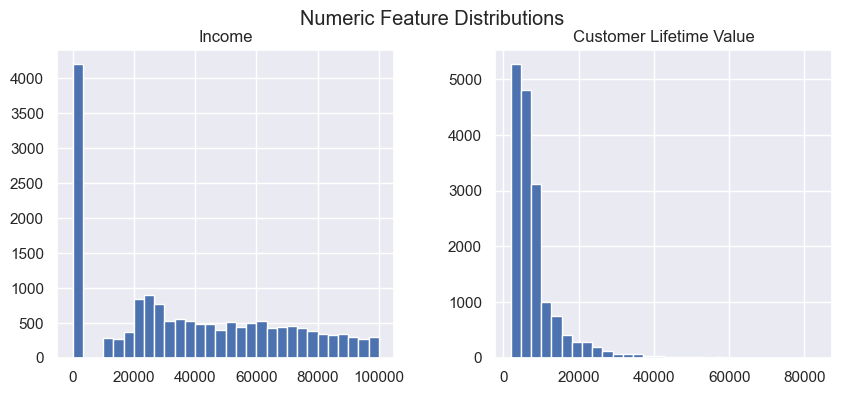

In [160]:
numeric_customer = ["Income", "Customer Lifetime Value"]
customer[numeric_customer].hist(bins=30 ,figsize=(10,4))
plt.suptitle("Numeric Feature Distributions")
plt.show()


The distributions of Income and Customer Lifetime Value are highly right-skewed, with the vast majority of customers concentrated at low values. The presence of a long tail suggests potential high-value customers, but these instances should be investigated to determine if they represent a genuine business segment (e.g., corporate clients) or data outliers.


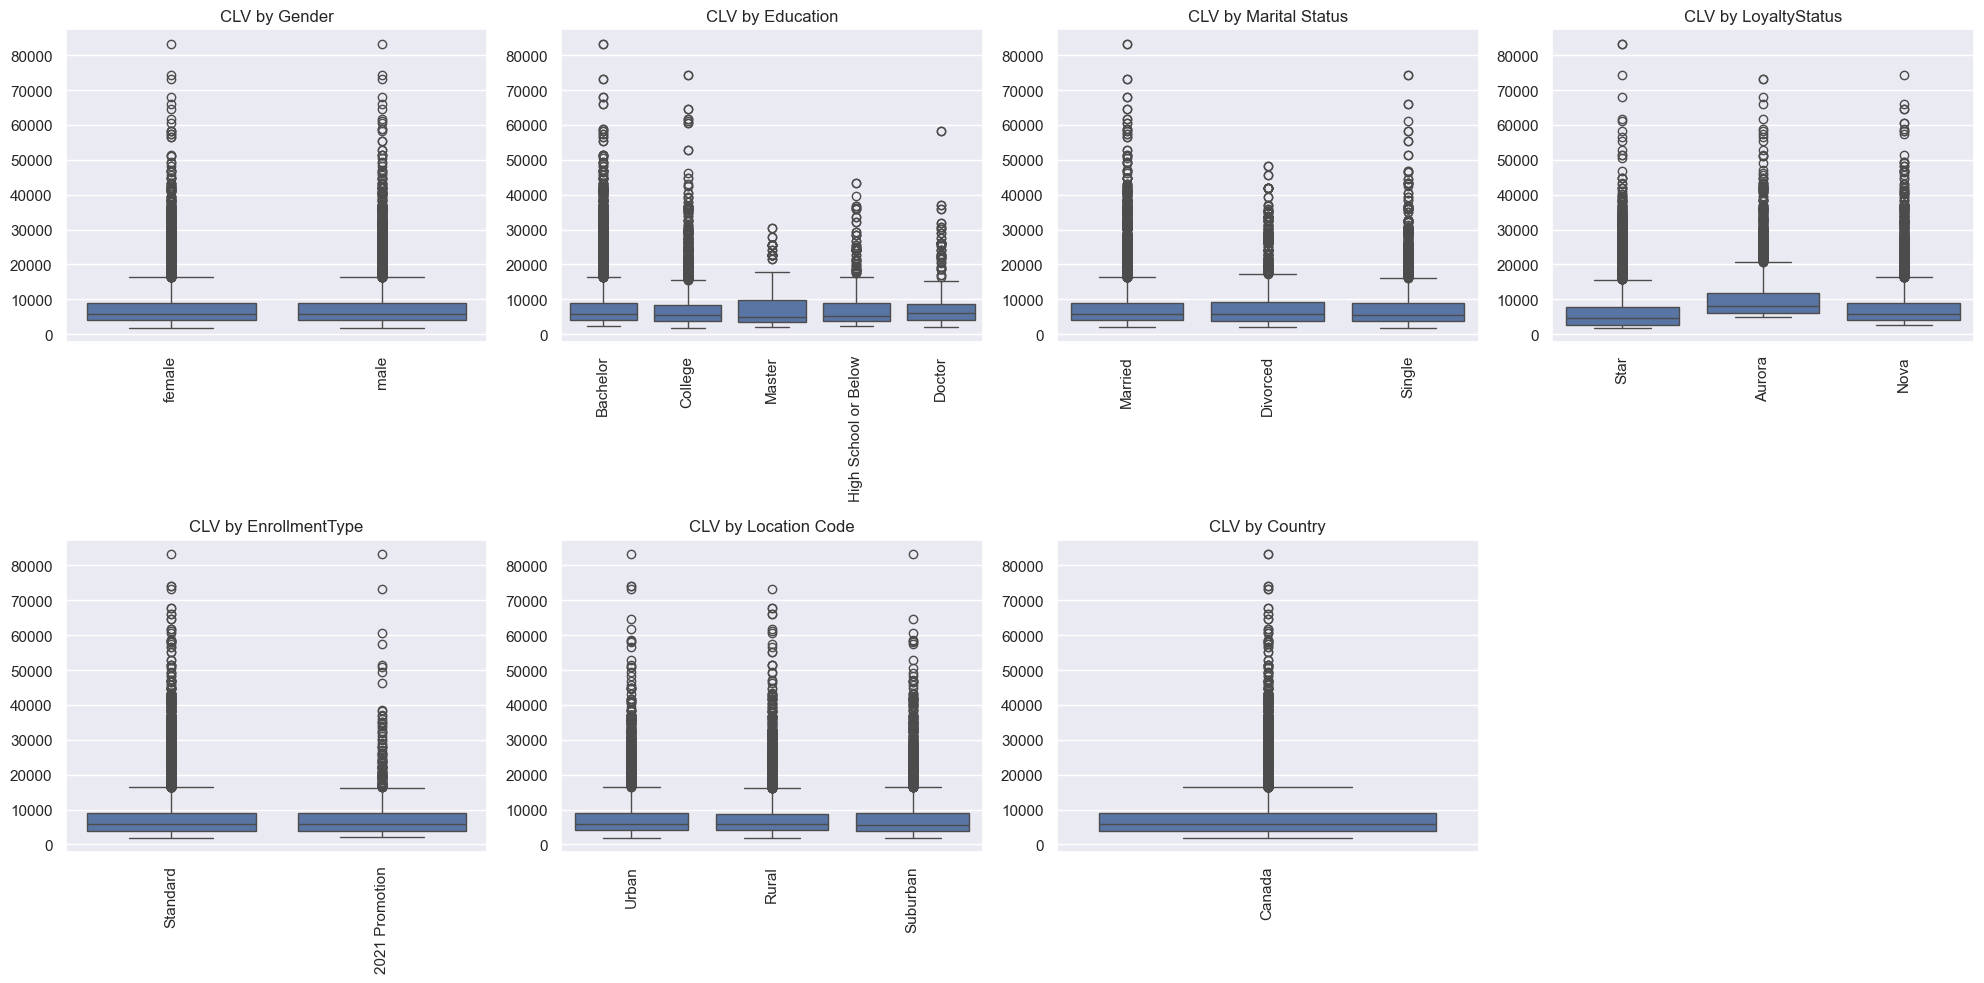

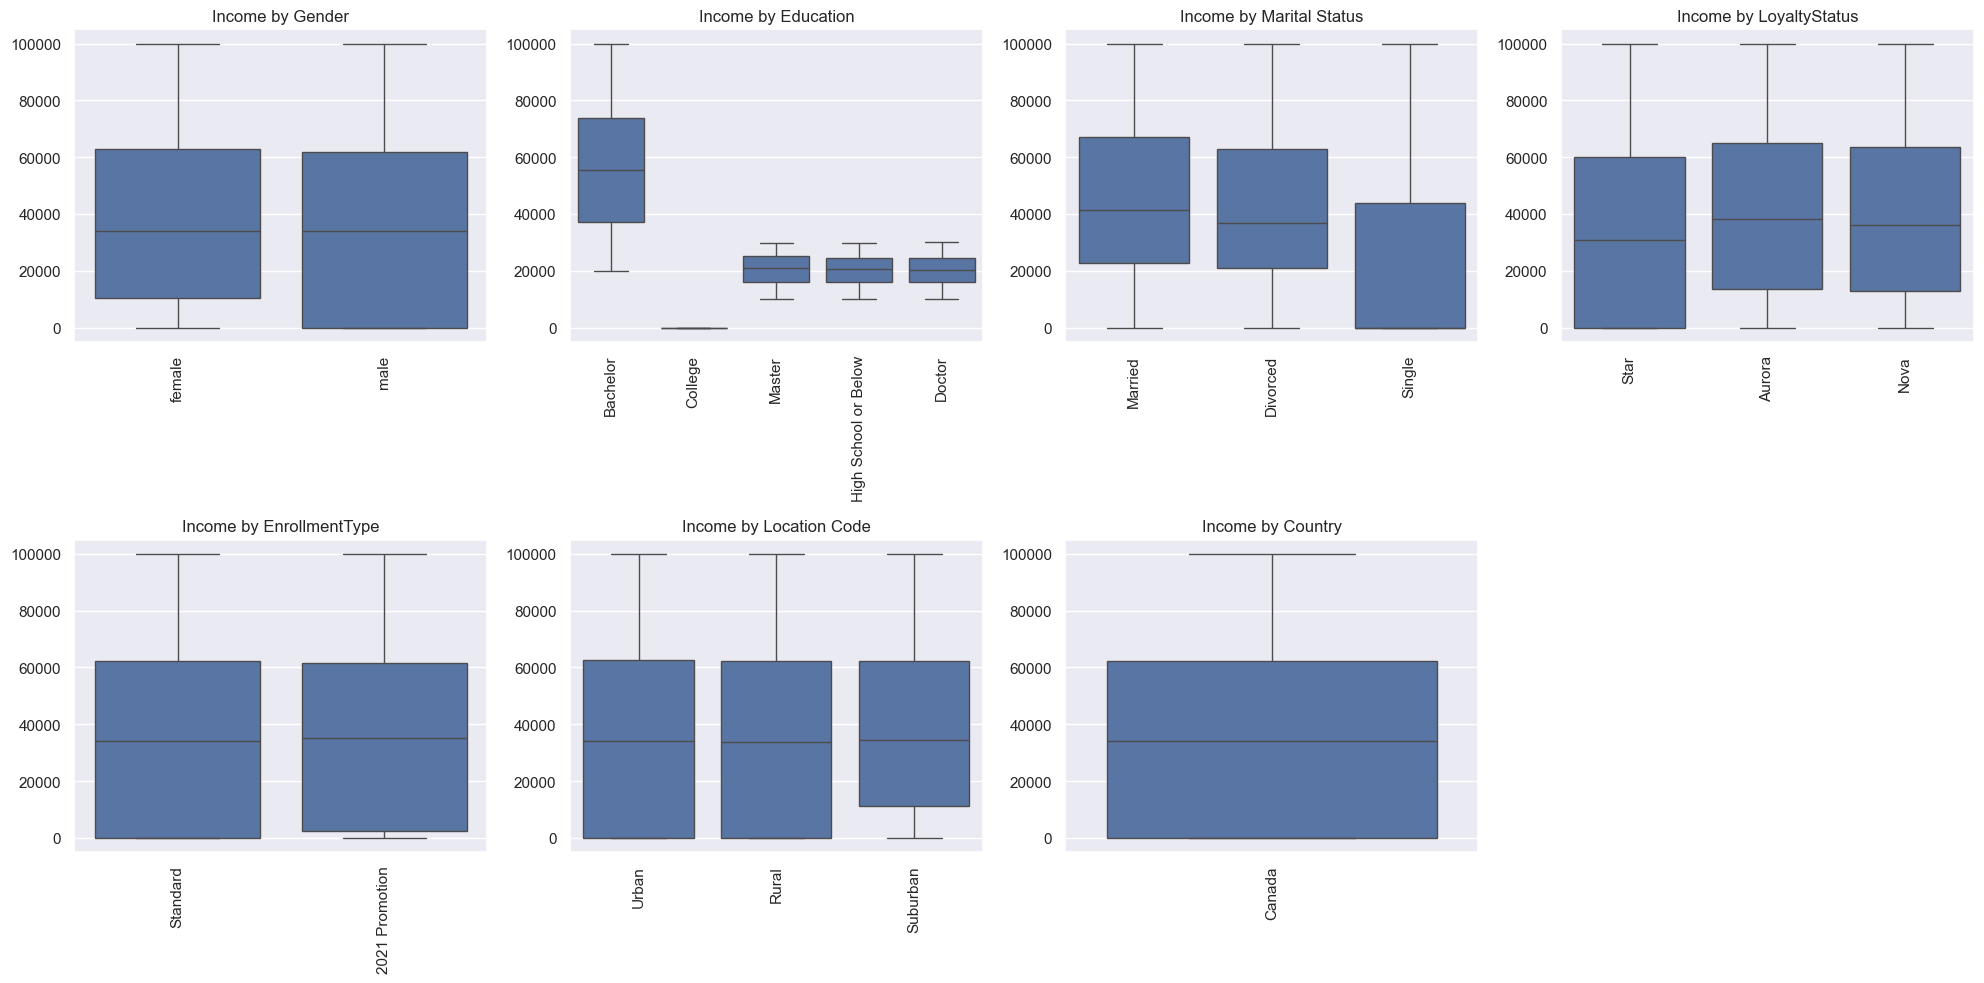

In [161]:
plt.figure(figsize=(20, 10))
for i, cat_col in enumerate(categorical_customer, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(x=cat_col, y="Customer Lifetime Value", data=customer)
    plt.title(f"CLV by {cat_col}")
    plt.xlabel("")
    plt.ylabel("")
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

plt.figure(figsize=(20, 10))
for i, cat_col in enumerate(categorical_customer, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(x=cat_col, y="Income", data=customer)
    plt.title(f"Income by {cat_col}")
    plt.xlabel("")
    plt.ylabel("")
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [162]:
def find_group_outliers(df, group_col, value_col, k=1.5):
    outlier_idx = []
    for name, g in df.groupby(group_col):
        q1 = g[value_col].quantile(0.25)
        q3 = g[value_col].quantile(0.75)
        iqr = q3 - q1
        lower = q1 - k * iqr
        upper = q3 + k * iqr
        mask = (g[value_col] < lower) | (g[value_col] > upper)
        outlier_idx.extend(g[mask].index.tolist())
    return df.loc[outlier_idx]

def outliers_for_all(df, cat_cols, value_cols=("Customer Lifetime Value", "Income"), k=1.5):
    results = {}
    for val in value_cols:
        print(f"\n--- {val} ---")
        # compute outliers per categorical column
        for col in cat_cols:
            out = find_group_outliers(df, col, val, k=k)
            results[(col, val)] = out
            print(f"{col}: {len(out)} outliers")
    return results

outliers_dict = outliers_for_all(customer, categorical_customer)



--- Customer Lifetime Value ---
Gender: 1463 outliers
Education: 1477 outliers
Marital Status: 1446 outliers
LoyaltyStatus: 1355 outliers
EnrollmentType: 1460 outliers
Location Code: 1445 outliers
Country: 1460 outliers

--- Income ---
Gender: 0 outliers
Education: 0 outliers
Marital Status: 0 outliers
LoyaltyStatus: 0 outliers
EnrollmentType: 0 outliers
Location Code: 0 outliers
Country: 0 outliers


### Income Distribution by Loyalty Status
The median Income is similar but slightly lower for the Star loyalty group compared to Aurora and Nova. However, the overall distribution and range of Income across all three groups are highly consistent, with the Interquartile Ranges (IQR) and whiskers spanning similar values (from approximately $0 to $100,000). This suggests that Loyalty Status is not a strong differentiator of customer income levels.

### Customer liftime value by Loyalty Status
The plot shows that high-CLV customers (outliers) are not segregated within a single, premium loyalty status; they are present across all three loyalty statuses (Star, Aurora, and Nova). While the Aurora tier shows a slightly higher median CLV, the overall pattern suggests that Loyalty Status is a poor predictor of a customer's lifetime value.

### Income Distribution by Education Level
The analysis reveals that a Bachelor's degree is the dominant factor determining high customer income, with this group showing a significantly higher median and broader Interquartile Range (IQR) than all others. In contrast, Master's, High School, and Doctor levels show consistently low and similar median incomes. Crucially, the College category displays a median income of zero, pointing to a severe data quality issue (missing or improperly coded income values) that must be addressed prior to any predictive modeling.

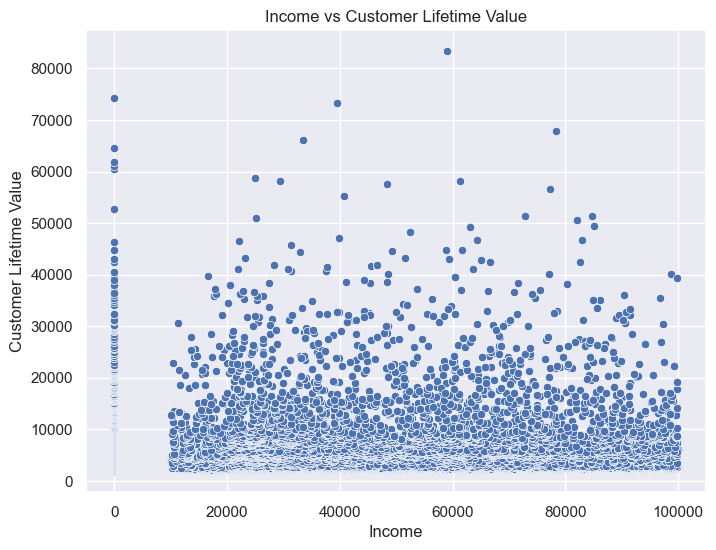

In [163]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Income', y='Customer Lifetime Value', data=customer)
plt.title('Income vs Customer Lifetime Value')
plt.show()

The scatter plot confirms that there is no strong linear correlation between Income and Customer Lifetime Value (CLV). High-CLV customers (the upper outliers) are observed across the entire income spectrum, demonstrating that a customer's purchasing power is not the primary driver of their long-term value. This suggests that predictive models should prioritize behavioral features over income.

#### Flights Insights 

In [164]:
flight.describe().T

count                           mean  \
Loyalty#                  596664.0                  549435.680825   
Year                      596664.0                         2020.0   
Month                     596664.0                            6.5   
YearMonthDate               596664  2020-06-16 02:40:00.000000768   
NumFlights                596664.0                       3.845372   
NumFlightsWithCompanions  596664.0                       0.936168   
DistanceKM                596664.0                    7973.603444   
PointsAccumulated         596664.0                     797.122897   
PointsRedeemed            596664.0                     236.461457   
DollarCostPointsRedeemed  596664.0                       2.336869   

                                          min                  25%  \
Loyalty#                             100018.0             326234.0   
Year                                   2019.0               2019.0   
Month                                     1.0                 3.75   
YearMonthDate             2019-01-01 00:00:00  2019-09-23 12:00:00   
NumFlights                                0.0                  0.0   
NumFlightsWithCompanions                  0.0                  0.0   
DistanceKM                                0.0                  0.0   
PointsAccumulated                         0.0                  0.0   
PointsRedeemed                            0.0                  0.0   
DollarCostPointsRedeemed                  0.0                  0.0   

                                          50%                  75%  \
Loyalty#                             550020.0             771901.0   
Year                                   2020.0               2021.0   
Month                                     6.5                 9.25   
YearMonthDate             2020-06-16 00:00:00  2021-03-08 18:00:00   
NumFlights                                0.0                  7.0   
NumFlightsWithCompanions                  0.0                  1.0   
DistanceKM                              984.5              15400.0   
PointsAccumulated                        98.0               1540.0   
PointsRedeemed                            0.0                  0.0   
DollarCostPointsRedeemed                  0.0                  0.0   

                                          max            std  
Loyalty#                             999986.0  258867.195581  
Year                                   2021.0       0.816497  
Month                                    12.0       3.452055  
YearMonthDate             2021-12-01 00:00:00            NaN  
NumFlights                               21.0       5.022941  
NumFlightsWithCompanions                 11.0       1.968412  
DistanceKM                            42040.0   10269.174348  
PointsAccumulated                      4204.0    1026.742807  
PointsRedeemed                         7496.0     985.650609  
DollarCostPointsRedeemed                 74.0       9.749377

### Univariate analysis


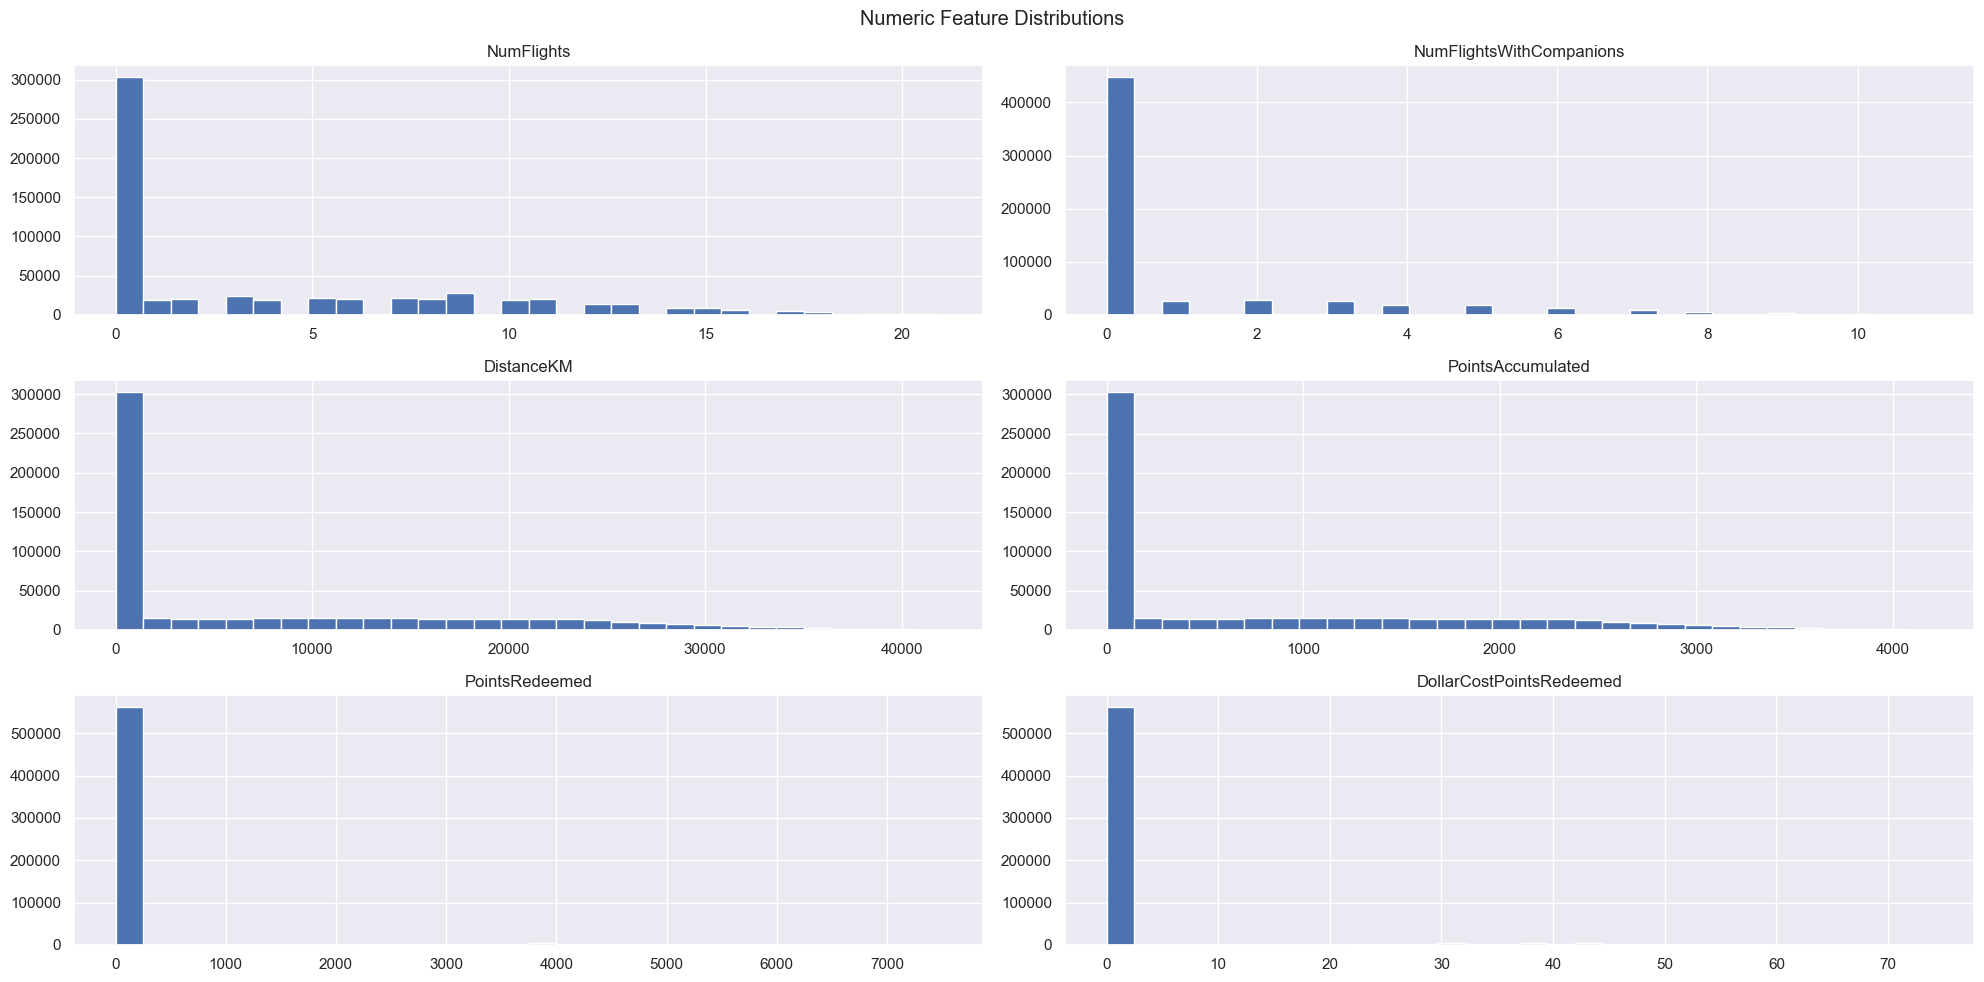

Número de outliers por variável:
NumFlights                   6814
NumFlightsWithCompanions    95880
DistanceKM                   1828
PointsAccumulated            1821
PointsRedeemed              34884
DollarCostPointsRedeemed    34884
dtype: int64


In [165]:
numeric_flights = ["NumFlights", "NumFlightsWithCompanions", "DistanceKM", "PointsAccumulated", "PointsRedeemed", "DollarCostPointsRedeemed"]

# Histograms
flight[numeric_flights].hist(bins=30, figsize=(20, 10))
plt.suptitle("Numeric Feature Distributions")
plt.tight_layout()
plt.show()

# Identificar outliers usando IQR
Q1 = flight[numeric_flights].quantile(0.25)
Q3 = flight[numeric_flights].quantile(0.75)
IQR = Q3 - Q1

outliers = ((flight[numeric_flights] < (Q1 - 1.5 * IQR)) | (flight[numeric_flights] > (Q3 + 1.5 * IQR))).sum()
print("Número de outliers por variável:")
print(outliers)

### Multivariate analysis


In [166]:
flight.groupby(["Year", "Month"])["NumFlights"].sum()

Year  Month
2019  1         38645
      2         38753
      3         52952
      4         45638
      5         53729
      6         67803
      7         75705
      8         65973
      9         51971
      10        48921
      11        45897
      12        64287
2020  1         47266
      2         47102
      3         63398
      4         55080
      5         64345
      6         79345
      7         88023
      8         77554
      9         62370
      10        59427
      11        56036
      12        76462
2021  1         48422
      2         47841
      3         65889
      4         55915
      5         75675
      6         91401
      7        102553
      8         89049
      9         71788
      10        67916
      11        64310
      12        86954
Name: NumFlights, dtype: int64

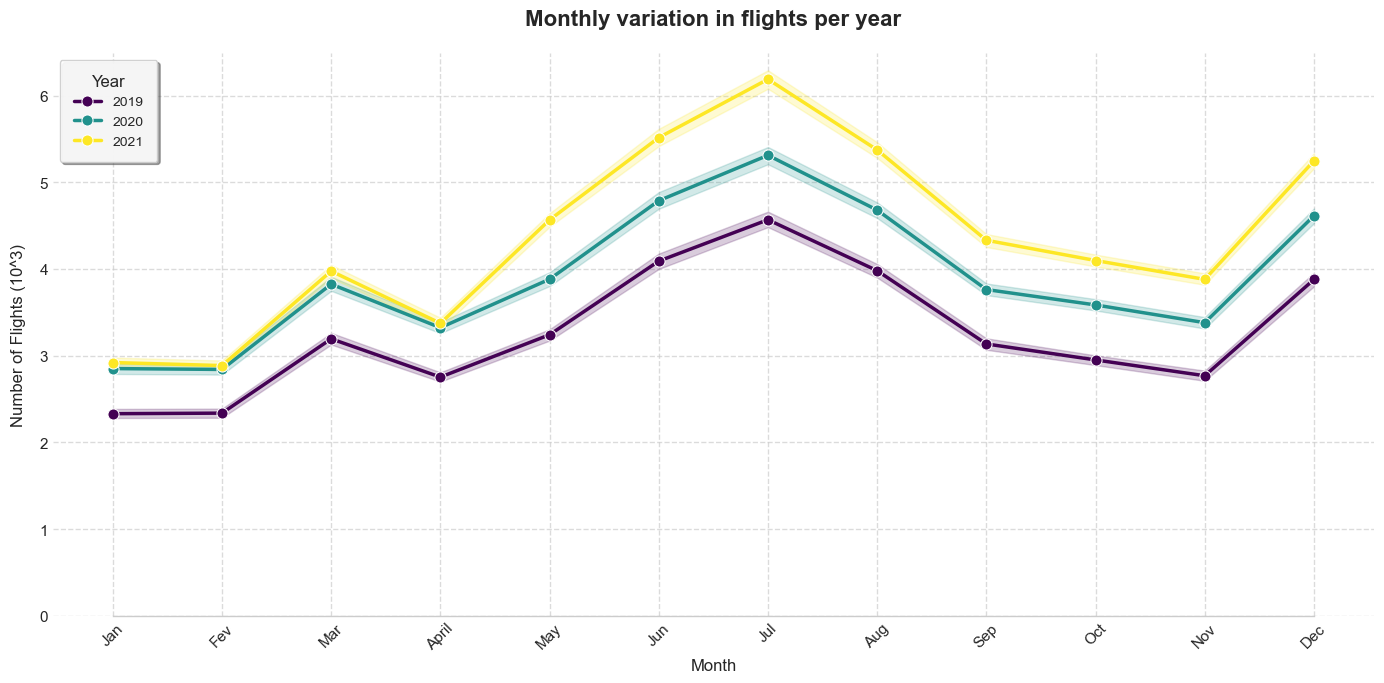

In [167]:
# Choosing the style 
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(14, 7))

# Create the graph
ax = sns.lineplot(
        data=flight,
        x="Month",
        y="NumFlights",
        hue="Year",
        palette="viridis",  # Color scheme
        linewidth=2.5,
        marker='o',         # Add markers
        markersize=8     
    )

# Melhorando os títulos e rótulos
plt.title("Monthly variation in flights per year",
            fontsize=16,
            fontweight='bold',
            pad=20)
plt.ylabel('Number of Flights (10^3)', fontsize=12, labelpad=10)

# Create a legend
plt.legend(
        title='Year',
        title_fontsize=12,
        fontsize=10,
        frameon=True,
        fancybox=True,
        framealpha=0.9,
        shadow=True,
        borderpad=1
)

# Ajustando os eixos
plt.xticks(range(1, 13),
           ['Jan', 'Fev', 'Mar', 'April', 'May', 'Jun',
            'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
           rotation=45)
plt.ylim(0)

    # Adicionando grid
plt.grid(True, linestyle='--', alpha=0.7)

    # Ajustando as bordas
sns.despine(trim=True, left=True)

    # Ajustando o layout
plt.tight_layout()

    # Mostrando o gráfico
plt.show()

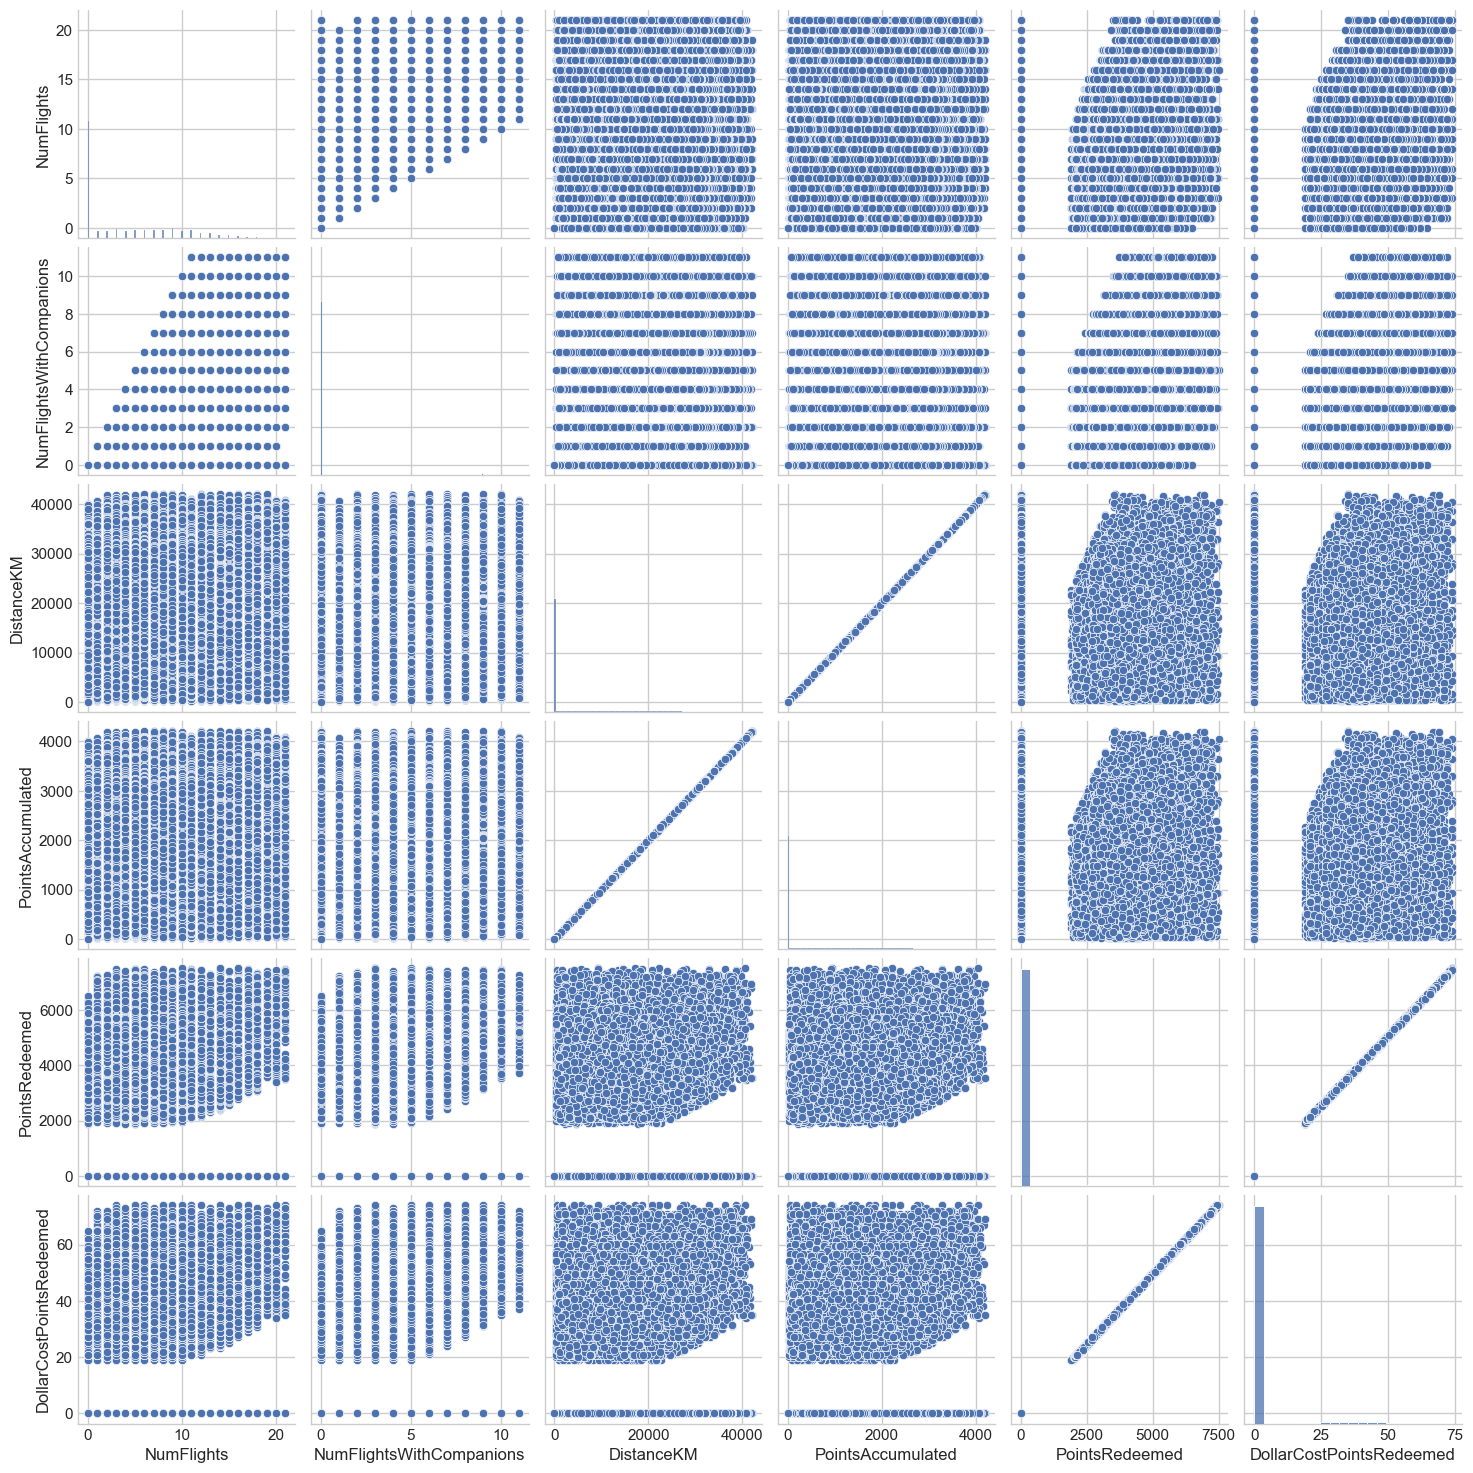

In [168]:
sns.pairplot(data=flight, vars= numeric_flights)

plt.show()

During the exploration, several features were found to have strong linear relationships. These are not coincidental correlations but rather indicators of specific business rules used by the airline.

A strong positive correlation was observed between DistanceKM and PointsAccumulated. This is expected, as it reflects the loyalty program's core mechanic: customers earn points based on the distance they fly.

However, the analysis revealed a more precise calculation. The data shows that the number of points awarded is based on a fixed ratio. For example, flights of 2,388 km and 2,380 km both yield 238 points. This strongly suggests that the business rule is PointsAccumulated = floor(DistanceKM / 10).

This means that points are awarded for every full 10 kilometers flown, and any remaining unit-level distance is truncated. Understanding this specific rule is key, as it explains the exact, predictable nature of how points are earned.

Similarly, the strong correlation between PointsRedeemed and DollarCostPointsRedeemed points to a derived relationship, not a behavioral one.

The DollarCostPointsRedeemed is likely an internal accounting metric. It is almost certainly calculated by multiplying the PointsRedeemed by a fixed monetary rate (a "cost-per-point") that the airline uses to track the financial liability of its loyalty program. This makes one variable a direct linear function of the other, explaining the perfect or near-perfect correlation.

The heatmap below comprove the things that we observed

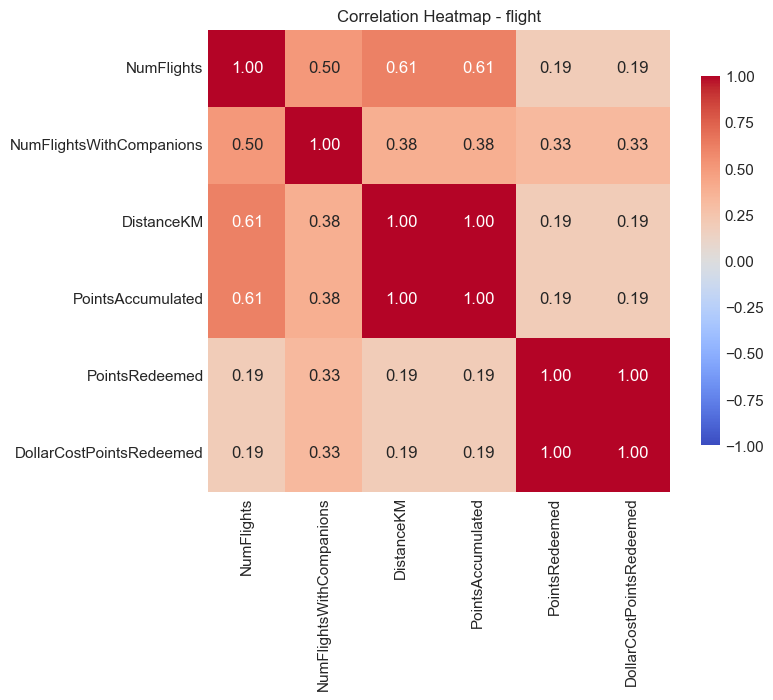

In [169]:

correlation_matrix = flight[numeric_flights].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, 
            annot=True,           # Mostrar valores dentro dos quadrados
            cmap='coolwarm',      # Esquema de cores (azul-vermelho)
            vmin=-1, vmax=1,      # Limites da escala de correlação
            center=0,             # Centralizar em 0
            square=True,          # Quadrados em vez de retângulos
            fmt='.2f',            # Formato com 2 casas decimais
            cbar_kws={'shrink': 0.8})  # Tamanho da barra de cores

plt.title("Correlation Heatmap - flight")
plt.show()
plt.show()

In [170]:
numeric_cols = [
    'NumFlights',
    'DistanceKM',
    'PointsAccumulated',
    'PointsRedeemed',
    'DollarCostPointsRedeemed',
    'Customer Lifetime Value',
    'Income'
]

merged = pd.merge(customer, flight, on='Loyalty#', how='inner')
agg = merged.groupby('Loyalty#', as_index=False).agg({
    'NumFlights': 'sum',
    'DistanceKM': 'sum',
    'PointsAccumulated': 'sum',
    'PointsRedeemed': 'sum',
    'DollarCostPointsRedeemed': 'sum',
    'Customer Lifetime Value': 'mean',
    'Income': 'first',
    'LoyaltyStatus': 'first',
    'Gender': 'first',
    'Education': 'first',
})

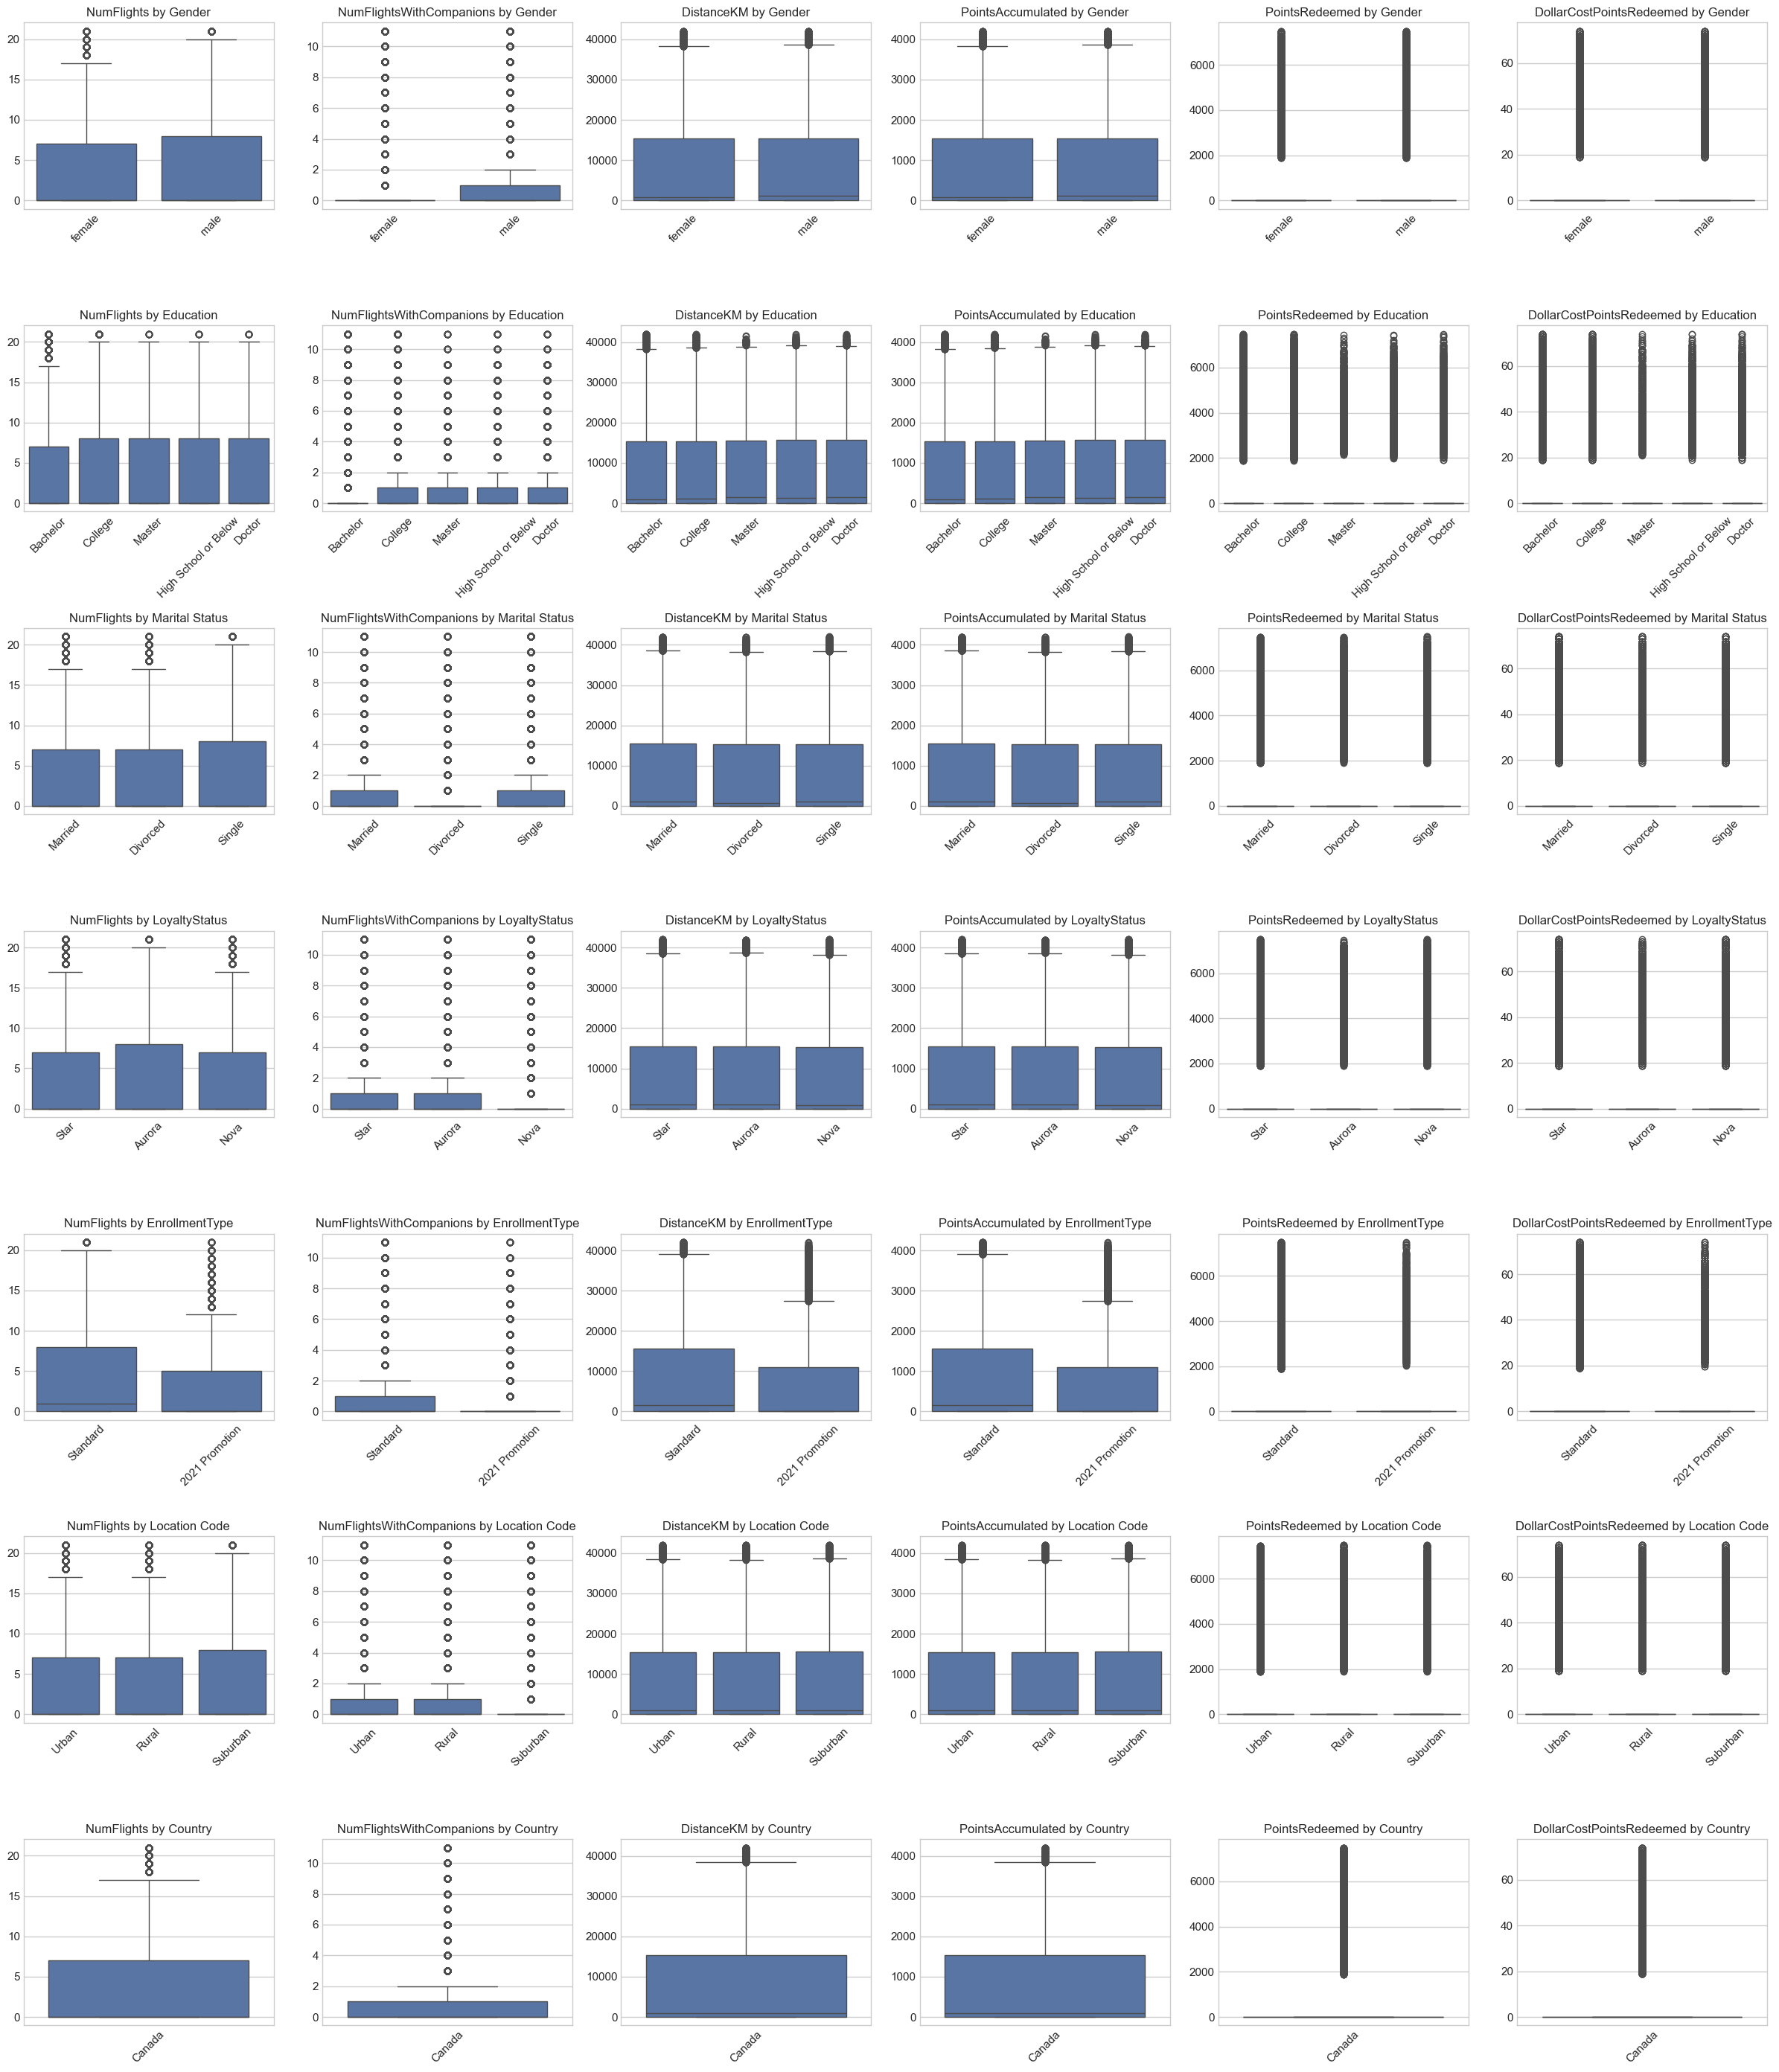

In [171]:
n_rows = len(categorical_customer)
n_cols = len(numeric_flights)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(4*n_cols, 4*n_rows))

for i, cat in enumerate(categorical_customer):
    for j, num in enumerate(numeric_flights):
        ax = axes[i, j]
        sns.boxplot(x=cat, y=num, data=merged, ax=ax)
        ax.set_title(f'{num} by {cat}')
        ax.set_xlabel('')
        ax.set_ylabel('')
        ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
#sns.pairplot(merged[numeric_cols], diag_kind='kde', plot_kws={'alpha':0.6})
#plt.suptitle('Pairplot – Customer & Flight Numerical Variables', y=1.02)
#plt.show()

# so coloquei # para nao demorar a correr


KeyboardInterrupt: 

## Data Pre-processing

### Feature Selection

### Feature Engineering

This section aggregates flight-related data for each customer based on their unique Loyalty# identifier.
A reusable function (cumulative_customer) is defined to compute the total sum of a selected column (e.g., number of flights, distance traveled, points accumulated, and points redeemed) per customer.
The resulting aggregated datasets are then merged into the main customer DataFrame to enrich it with cumulative statistics for each individual.

In [173]:
def cumulative_customer(col):
    total = flight.groupby("Loyalty#")[col].sum().reset_index()
    return total

In [174]:
total_flights = cumulative_customer("NumFlights")

In [175]:
total_DistanceKM = cumulative_customer("DistanceKM")

In [176]:
total_PointsAccumulated = cumulative_customer("PointsAccumulated")

In [177]:
total_PointsRedeemed = cumulative_customer("PointsRedeemed")

In [178]:
total_DollarCostPointsRedeemed = cumulative_customer("DollarCostPointsRedeemed")

In [179]:
total_NumFlightsWithCompanions = cumulative_customer("NumFlightsWithCompanions")


In [180]:
new_columns = [total_flights,total_DistanceKM,total_PointsAccumulated,total_PointsRedeemed,total_DollarCostPointsRedeemed,total_NumFlightsWithCompanions]

for data in new_columns:
    customer = customer.merge(data, on="Loyalty#", how="left")
    
customer.head(3)

Loyalty# First Name    Last Name        Customer Name Country  \
0    480934    Cecilia  Householder  Cecilia Householder  Canada   
1    549612      Dayle        Menez          Dayle Menez  Canada   
2    429460     Necole       Hannon        Necole Hannon  Canada   

  Province or State       City   Latitude   Longitude Postal code  ...  \
0           Ontario    Toronto  43.653225  -79.383186     M2Z 4K1  ...   
1           Alberta   Edmonton  53.544388 -113.490930     T3G 6Y6  ...   
2  British Columbia  Vancouver  49.282730 -123.120740     V6E 3D9  ...   

  EnrollmentDateOpening CancellationDate Customer Lifetime Value  \
0            2019-02-15       1904-01-01                 3839.14   
1            2019-03-09       1904-01-01                 3839.61   
2            2017-07-14       2021-01-08                 3839.75   

   EnrollmentType NumFlights DistanceKM PointsAccumulated PointsRedeemed  \
0        Standard        184   507054.9             50693          13517   
1        Standard        275   426827.4             42669          22457   
2        Standard        116   238376.1             23827           5479   

   DollarCostPointsRedeemed NumFlightsWithCompanions  
0                     134.6                       53  
1                     221.4                       30  
2                      53.2                       37  

[3 rows x 26 columns]

In [181]:
customer["Province or State"].unique()

array(['Ontario', 'Alberta', 'British Columbia', 'Quebec',
       'New Brunswick', 'Manitoba', 'Nova Scotia', 'Saskatchewan',
       'Newfoundland', 'Yukon', 'Prince Edward Island'], dtype=object)

In [182]:
last_flight = (
    flight[flight['NumFlights'] > 0]
    .groupby('Loyalty#')['YearMonthDate']
    .max()
    .reset_index()
    .rename(columns={'YearMonthDate': 'last_flight_date'})
)
reference_date = flight['YearMonthDate'].max()

last_flight['recency_months'] = (
        (reference_date.year - last_flight['last_flight_date'].dt.year) * 12 +
        (reference_date.month - last_flight['last_flight_date'].dt.month)
)
customer = customer.merge(last_flight[['Loyalty#', 'recency_months']], on='Loyalty#', how='left')
customer.replace({"recency_months": {np.nan: -1}}, inplace=True)
customer['recency_months'] = customer['recency_months'].astype(int)
customer.head(5)


Loyalty# First Name    Last Name        Customer Name Country  \
0    480934    Cecilia  Householder  Cecilia Householder  Canada   
1    549612      Dayle        Menez          Dayle Menez  Canada   
2    429460     Necole       Hannon        Necole Hannon  Canada   
3    608370      Queen        Hagee          Queen Hagee  Canada   
4    530508     Claire      Latting       Claire Latting  Canada   

  Province or State       City   Latitude   Longitude Postal code  ...  \
0           Ontario    Toronto  43.653225  -79.383186     M2Z 4K1  ...   
1           Alberta   Edmonton  53.544388 -113.490930     T3G 6Y6  ...   
2  British Columbia  Vancouver  49.282730 -123.120740     V6E 3D9  ...   
3           Ontario    Toronto  43.653225  -79.383186     P1W 1K4  ...   
4            Quebec       Hull  45.428730  -75.713364     J8Y 3Z5  ...   

  CancellationDate Customer Lifetime Value  EnrollmentType  NumFlights  \
0       1904-01-01                 3839.14        Standard         184   
1       1904-01-01                 3839.61        Standard         275   
2       2021-01-08                 3839.75        Standard         116   
3       1904-01-01                 3839.75        Standard         191   
4       1904-01-01                 3842.79  2021 Promotion         167   

  DistanceKM PointsAccumulated PointsRedeemed DollarCostPointsRedeemed  \
0   507054.9             50693          13517                    134.6   
1   426827.4             42669          22457                    221.4   
2   238376.1             23827           5479                     53.2   
3   386029.3             38591          16331                    162.2   
4   369242.6             36913              0                      0.0   

   NumFlightsWithCompanions recency_months  
0                        53              0  
1                        30              0  
2                        37             11  
3                        55              0  
4                        59              0  

[5 rows x 27 columns]

In [183]:
customer[(customer["NumFlights"] == 0) & (customer["CancellationDate"] == pd.Timestamp("1904-01-01")) ]
#Clients that are active but never flew

Loyalty# First Name    Last Name     Customer Name Country  \
66       329382       Ngoc    Dubuisson    Ngoc Dubuisson  Canada   
149      695755     Horace      Astolfi    Horace Astolfi  Canada   
156      203809    Stefani        Hiney     Stefani Hiney  Canada   
180      242377       Jada       Aurges       Jada Aurges  Canada   
294      531201    Porsche     Fluharty  Porsche Fluharty  Canada   
...         ...        ...          ...               ...     ...   
16405    714161    Jamison      Beaupre   Jamison Beaupre  Canada   
16458    741926        Noe  Keomuangtai   Noe Keomuangtai  Canada   
16478    935665      Bobbi   Bracamonte  Bobbi Bracamonte  Canada   
16498    350486  Annamaria       Purdue  Annamaria Purdue  Canada   
16545    851979       Dion   Fagerstrom   Dion Fagerstrom  Canada   

      Province or State            City   Latitude   Longitude Postal code  \
66               Quebec        Montreal  45.501690  -73.567253     H2T 9K8   
149    British Columbia  West Vancouver  49.328625 -123.160190     V6V 8Z3   
156             Alberta        Edmonton  53.544388 -113.490930     T3G 6Y6   
180             Ontario         Trenton  44.101128  -77.576309     K8V 4B2   
294    British Columbia  West Vancouver  49.328625 -123.160190     V6V 8Z3   
...                 ...             ...        ...         ...         ...   
16405            Quebec            Hull  45.428730  -75.713364     J8Y 3Z5   
16458           Ontario          Ottawa  45.421532  -75.697189     K1F 2R2   
16478           Ontario         Toronto  43.653225  -79.383186     M1R 4K3   
16498     New Brunswick     Fredericton  45.963589  -66.643112     E3B 2H2   
16545           Ontario          Ottawa  45.421532  -75.697189     K1F 2R2   

       ... CancellationDate Customer Lifetime Value  EnrollmentType  \
66     ...       1904-01-01                 3961.59  2021 Promotion   
149    ...       1904-01-01                 4144.87        Standard   
156    ...       1904-01-01                 4165.35        Standard   
180    ...       1904-01-01                 4221.31  2021 Promotion   
294    ...       1904-01-01                 4419.54        Standard   
...    ...              ...                     ...             ...   
16405  ...       1904-01-01                26416.25        Standard   
16458  ...       1904-01-01                29706.78        Standard   
16478  ...       1904-01-01                31221.75        Standard   
16498  ...       1904-01-01                32861.26        Standard   
16545  ...       1904-01-01                39033.08        Standard   

       NumFlights DistanceKM PointsAccumulated PointsRedeemed  \
66              0        0.0                 0              0   
149             0        0.0                 0              0   
156             0        0.0                 0              0   
180             0        0.0                 0              0   
294             0        0.0                 0              0   
...           ...        ...               ...            ...   
16405           0        0.0                 0              0   
16458           0        0.0                 0              0   
16478           0        0.0                 0              0   
16498           0        0.0                 0              0   
16545           0        0.0                 0              0   

      DollarCostPointsRedeemed  NumFlightsWithCompanions recency_months  
66                         0.0                         0             -1  
149                        0.0                         0             -1  
156                        0.0                         0             -1  
180                        0.0                         0             -1  
294                        0.0                         0             -1  
...                        ...                       ...            ...  
16405                      0.0                         0             -1  
16458          

In [184]:
#sugestao do rui

In [185]:
customer["Tenure"] = (pd.Timestamp.today() - customer["EnrollmentDateOpening"]).dt.days

In [186]:
customer.sort_values(by='Tenure', ascending=True, inplace=True)

PointsUtilizationRate:
A proporção de pontos que o cliente efetivamente usou em relação ao total que acumulou.
- Alto valor (próximo de 1): cliente que usa os pontos com frequência, pode indicar um cliente engajado e atento às recompensas.
- Baixo valor (próximo de 0): cliente que acumula mas não resgata, pode indicar desinteresse, esquecimento ou falta de oportunidades relevantes de resgate.

CLVperflight:
O valor médio que o cliente gera por voo realizado.
- Alto valor: cliente que gasta muito por voo, pode ser um viajante premium, de negócios ou que compra serviços adicionais.
- Baixo valor: cliente que viaja muito mas gera pouco valor por voo, pode ser um caçador de promoções ou viajante econômico.


In [187]:
customer[(customer["NumFlights"] == 0) & (customer["Customer Lifetime Value"] > 0)]

Loyalty# First Name   Last Name      Customer Name Country  \
9494     170982       Elin    Standard      Elin Standard  Canada   
10877    253412     Glayds     Nesspor     Glayds Nesspor  Canada   
427      123928     Dimple  Stallworth  Dimple Stallworth  Canada   
7985     647393       Drew       Fodge         Drew Fodge  Canada   
7773     948961    Shemeka     Poitras    Shemeka Poitras  Canada   
...         ...        ...         ...                ...     ...   
149      695755     Horace     Astolfi     Horace Astolfi  Canada   
701      703882       Todd    Stargell      Todd Stargell  Canada   
7331     747655  Alexander        Bega     Alexander Bega  Canada   
5604     727197    Carylon    Levesque   Carylon Levesque  Canada   
7492     574745    Shanika        Puga       Shanika Puga  Canada   

      Province or State            City   Latitude   Longitude Postal code  \
9494             Quebec        Montreal  45.501690  -73.567253     H2Y 4R4   
10877            Quebec     Quebec City  46.813877  -71.207977     G1B 3L5   
427              Quebec       Tremblant  46.118462  -74.596184     H5Y 2S9   
7985             Quebec        Montreal  45.501690  -73.567253     H2T 9K8   
7773            Ontario         Trenton  44.101128  -77.576309     K8V 4B2   
...                 ...             ...        ...         ...         ...   
149    British Columbia  West Vancouver  49.328625 -123.160190     V6V 8Z3   
701    British Columbia        Whistler  50.116322 -122.957360     V6T 1Y8   
7331   British Columbia       Vancouver  49.282730 -123.120740     V6E 3D9   
5604   British Columbia       Vancouver  49.282730 -123.120740     V6E 3D9   
7492             Quebec        Montreal  45.501690  -73.567253     H2Y 4R4   

       ... Customer Lifetime Value EnrollmentType NumFlights  DistanceKM  \
9494   ...                24127.50       Standard          0         0.0   
10877  ...                 2551.23       Standard          0         0.0   
427    ...                 4624.56       Standard          0         0.0   
7985   ...                 8356.18       Standard          0         0.0   
7773   ...                 7908.45       Standard          0         0.0   
...    ...                     ...            ...        ...         ...   
149    ...                 4144.87       Standard          0         0.0   
701    ...                 4922.17       Standard          0         0.0   
7331   ...                 6981.08       Standard          0         0.0   
5604   ...                 4260.34       Standard          0         0.0   
7492   ...                 7367.65       Standard          0         0.0   

      PointsAccumulated PointsRedeemed DollarCostPointsRedeemed  \
9494                  0              0                      0.0   
10877                 0              0                      0.0   
427                   0              0                      0.0   
7985                  0              0                      0.0   
7773                  0              0                      0.0   
...                 ...            ...                      ...   
149                   0              0                      0.0   
701                   0              0                      0.0   
7331                  0              0                      0.0   
5604                  0              0                      0.0   
7492                  0              0                      0.0   

      NumFlightsWithCompanions  recency_months Tenure  
9494                         0              -1   1436  
10877                        0              -1   1436  
427                          0              -1   1436  
7985                         0              -1   1436  
7773                         0              -1   1436  
...                        ...             ...    ...  
149                          0              -1   3899  
701                          0              -1   3899  
7331               

In [188]:
customer["PointsUtilizationRate"] = customer["PointsRedeemed"] / (customer["PointsAccumulated"] + 1)
customer["CLVperflight"] = customer["Customer Lifetime Value"] / (customer["NumFlights"] + 1)

In [189]:
customer["CLVperflight"]

9494     24127.500000
10877     2551.230000
427       4624.560000
7985      8356.180000
11944       22.691250
             ...     
7976        45.802637
13107       27.893408
6173        27.836201
11788       16.124915
7492      7367.650000
Name: CLVperflight, Length: 16574, dtype: float64

#### Geovisualization

NOTE: 
 The map is interactive. Hover over the data points to view detailed information

In [190]:
import plotly.express as px


# Group by Province/State and count the number of customers
customermap = customer.groupby("Province or State").agg({
    "Loyalty#": "count",  # Count number of customers
    "Latitude": "first",
    "Longitude": "first",
    "LoyaltyStatus": lambda x: x.mode()[0],
    "NumFlights": "mean",
    "DistanceKM": "mean",
}).reset_index().rename(columns={"Loyalty#": "NumCustomers"})

# Create the map
fig = px.scatter_mapbox(
    customermap,
    lat="Latitude",
    lon="Longitude",
    size="NumCustomers",
    color="NumCustomers",
    hover_name="Province or State",
    hover_data={"NumCustomers": True, "Latitude": False, "Longitude": False, "NumFlights": True, "DistanceKM" : True, "LoyaltyStatus": True},
    zoom=3,
    height=700,
    title="Number of Customers by Canadian Province/State",
    color_continuous_scale=px.colors.sequential.Viridis
)

# Update layout for better visualization
fig.update_layout(
    mapbox_style="carto-positron",
    margin={"r": 0, "t": 50, "l": 0, "b": 0},
    coloraxis_colorbar=dict(
        title="Number of Customers",
        thicknessmode="pixels",
        thickness=20,
        lenmode="pixels",
        len=300,
        yanchor="top",
        y=1,
        xanchor="left",
        x=0.01
    )
)

fig.show()

C:\Users\Asus\AppData\Local\Temp\ipykernel_13360\2146920867.py:15: DeprecationWarning:

*scatter_mapbox* is deprecated! Use *scatter_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/



### Feature Encoding

One-Hot Encoding

In [191]:
metric_features = [
    'Income',
    'Customer Lifetime Value',
    'NumFlights',
    'DistanceKM',
    'PointsAccumulated',
    'PointsRedeemed',
    'recency_months',
    'Tenure',
    'PointsUtilizationRate',
    'CLVperflight',
    'DollarCostPointsRedeemed',
    'NumFlightsWithCompanions'
]

## Falta o encodig ainda vai mudar
categorical_features = [
    'Gender',
    'Education',
    'Marital Status',
    'LoyaltyStatus',
    'EnrollmentType',
    'Province or State',
    'City'
]

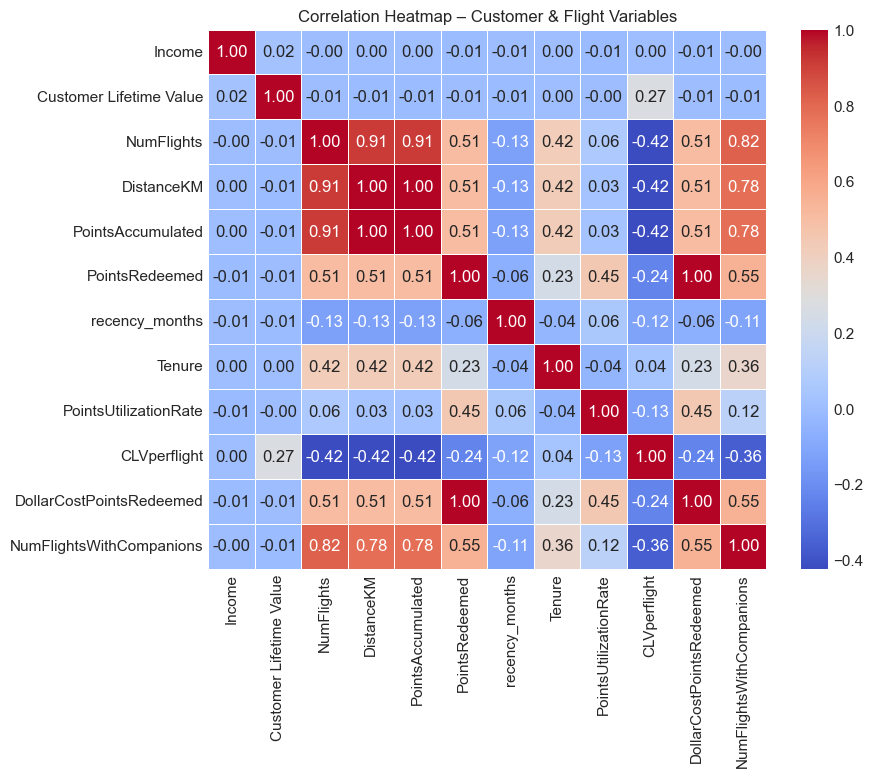

In [192]:
plt.figure(figsize=(9,7))
corr = customer[metric_features].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap – Customer & Flight Variables')
plt.show()

In [193]:
customer_oh = pd.get_dummies(customer[categorical_features], prefix='oh', drop_first=True, dtype=int)
customer = pd.concat([customer, customer_oh], axis=1)
non_metric_features = customer.columns[customer.columns.str.startswith('oh_')].tolist()

In [194]:
features_to_use = metric_features + non_metric_features

unused_features = [col for col in customer.columns if col not in features_to_use]

print(f"Features Métricas ({len(metric_features)}): {metric_features}")
print(f"Features One-Hot ({len(non_metric_features)}): {non_metric_features}")
print(f"Features Unused/Descartadas ({len(unused_features)}): {unused_features}")

Features Métricas (12): ['Income', 'Customer Lifetime Value', 'NumFlights', 'DistanceKM', 'PointsAccumulated', 'PointsRedeemed', 'recency_months', 'Tenure', 'PointsUtilizationRate', 'CLVperflight', 'DollarCostPointsRedeemed', 'NumFlightsWithCompanions']
Features One-Hot (48): ['oh_male', 'oh_College', 'oh_Doctor', 'oh_High School or Below', 'oh_Master', 'oh_Married', 'oh_Single', 'oh_Nova', 'oh_Star', 'oh_Standard', 'oh_British Columbia', 'oh_Manitoba', 'oh_New Brunswick', 'oh_Newfoundland', 'oh_Nova Scotia', 'oh_Ontario', 'oh_Prince Edward Island', 'oh_Quebec', 'oh_Saskatchewan', 'oh_Yukon', 'oh_Calgary', 'oh_Charlottetown', 'oh_Dawson Creek', 'oh_Edmonton', 'oh_Fredericton', 'oh_Halifax', 'oh_Hull', 'oh_Kelowna', 'oh_Kingston', 'oh_London', 'oh_Moncton', 'oh_Montreal', 'oh_Ottawa', 'oh_Peace River', 'oh_Quebec City', 'oh_Regina', "oh_St. John's", 'oh_Sudbury', 'oh_Thunder Bay', 'oh_Toronto', 'oh_Tremblant', 'oh_Trenton', 'oh_Vancouver', 'oh_Victoria', 'oh_West Vancouver', 'oh_Whistle

In [195]:
customer_cluster_df = customer[metric_features + non_metric_features].copy()

### Feature Scalling and Normalization

#### MinMaxScaler

In [196]:
df_minmax = customer_cluster_df.copy()

In [197]:
mm_scaler = MinMaxScaler()
mm_scaled_feat = mm_scaler.fit_transform(df_minmax[metric_features])

df_minmax[metric_features] = mm_scaled_feat
df_minmax[metric_features].describe().T.round(2)

count  mean   std  min   25%   50%   75%  max
Income                    16574.0  0.38  0.30  0.0  0.00  0.34  0.62  1.0
Customer Lifetime Value   16574.0  0.07  0.08  0.0  0.03  0.05  0.09  1.0
NumFlights                16574.0  0.40  0.23  0.0  0.20  0.46  0.58  1.0
DistanceKM                16574.0  0.40  0.23  0.0  0.20  0.47  0.58  1.0
PointsAccumulated         16574.0  0.40  0.23  0.0  0.20  0.46  0.58  1.0
PointsRedeemed            16574.0  0.15  0.15  0.0  0.00  0.11  0.24  1.0
recency_months            16574.0  0.09  0.14  0.0  0.04  0.04  0.08  1.0
Tenure                    16574.0  0.48  0.29  0.0  0.22  0.47  0.73  1.0
PointsUtilizationRate     16574.0  0.01  0.01  0.0  0.00  0.01  0.01  1.0
CLVperflight              16574.0  0.01  0.04  0.0  0.00  0.00  0.00  1.0
DollarCostPointsRedeemed  16574.0  0.15  0.15  0.0  0.00  0.11  0.23  1.0
NumFlightsWithCompanions  16574.0  0.28  0.19  0.0  0.13  0.29  0.42  1.0

MinMaxScaler compresses all data points into a fixed range between 0 and 1, where the lowest value becomes 0 and the highest becomes 1, ensuring that no single variable dominates the model simply because it has larger raw numbers.

#### StandardScaler

In [198]:
df_standard = customer_cluster_df.copy()

In [199]:
scaler = StandardScaler()
ss_scaled_feat = scaler.fit_transform(customer_cluster_df[metric_features])

df_standard[metric_features] = ss_scaled_feat
df_standard[metric_features].describe().T.round(2)

count  mean  std   min   25%   50%   75%    max
Income                    16574.0  -0.0  1.0 -1.24 -1.24 -0.12  0.81   2.05
Customer Lifetime Value   16574.0  -0.0  1.0 -0.89 -0.58 -0.32  0.14  10.99
NumFlights                16574.0   0.0  1.0 -1.76 -0.87  0.26  0.77   2.59
DistanceKM                16574.0  -0.0  1.0 -1.76 -0.87  0.27  0.77   2.60
PointsAccumulated         16574.0   0.0  1.0 -1.76 -0.87  0.27  0.77   2.60
PointsRedeemed            16574.0   0.0  1.0 -0.98 -0.98 -0.23  0.58   5.64
recency_months            16574.0  -0.0  1.0 -0.61 -0.31 -0.31 -0.02   6.41
Tenure                    16574.0  -0.0  1.0 -1.64 -0.89 -0.04  0.87   1.79
PointsUtilizationRate     16574.0   0.0  1.0 -0.59 -0.59 -0.15  0.27  67.43
CLVperflight              16574.0  -0.0  1.0 -0.25 -0.25 -0.24 -0.22  25.06
DollarCostPointsRedeemed  16574.0  -0.0  1.0 -0.98 -0.98 -0.23  0.58   5.67
NumFlightsWithCompanions  16574.0   0.0  1.0 -1.51 -0.84  0.06  0.73   3.83

StandardScaler transforms the data so that the mean is 0 and the standard deviation is 1. It tells us how many standard deviations a data point is above or below the average, without imposing fixed maximum or minimum limits.

#### Comparing different scalers vs original data

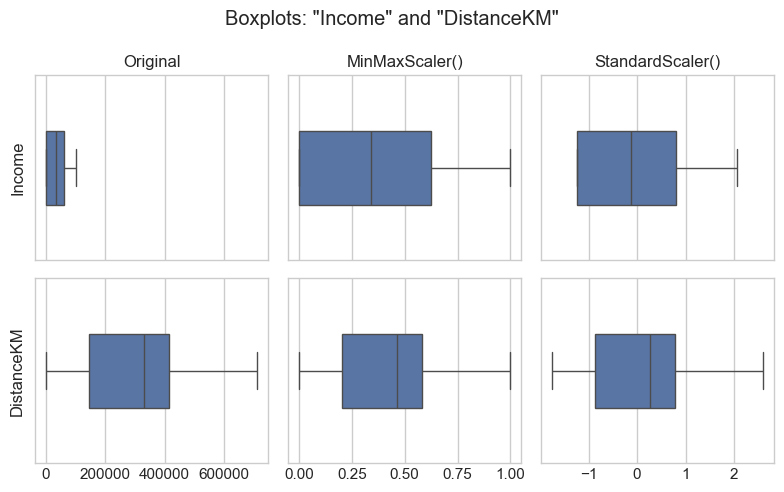

In [200]:

sns.set_style('whitegrid')
# Aumentar o figsize para que 6 boxplots fiquem legíveis
fig, axes = plt.subplots(2, 3, figsize=(8, 5), tight_layout=True, sharex='col', sharey='row')

bp_feat_l = 'Income'

sns.boxplot(customer_cluster_df, x=bp_feat_l, ax=axes[0][0], width=.4)
axes[0][0].set_title('Original')
axes[0][0].set_ylabel(bp_feat_l)

sns.boxplot(df_minmax, x=bp_feat_l, ax=axes[0][1], width=.4)
axes[0][1].set_title('MinMaxScaler()')

sns.boxplot(df_standard, x=bp_feat_l, ax=axes[0][2], width=.4)
axes[0][2].set_title('StandardScaler()')



bp_feat_r = 'DistanceKM'

sns.boxplot(customer_cluster_df, x=bp_feat_r, ax=axes[1][0], width=.4)
axes[1][0].set_ylabel(bp_feat_r)

sns.boxplot(df_minmax, x=bp_feat_r, ax=axes[1][1], width=.4)

sns.boxplot(df_standard, x=bp_feat_r, ax=axes[1][2], width=.4)


axes[1][0].set_xlabel(None)
axes[1][1].set_xlabel(None)
axes[1][2].set_xlabel(None)

fig.suptitle('Boxplots: "{}" and "{}"'.format(bp_feat_l, bp_feat_r))
plt.show()

Text(0.5, 0.98, 'Boxplots: "Income"')

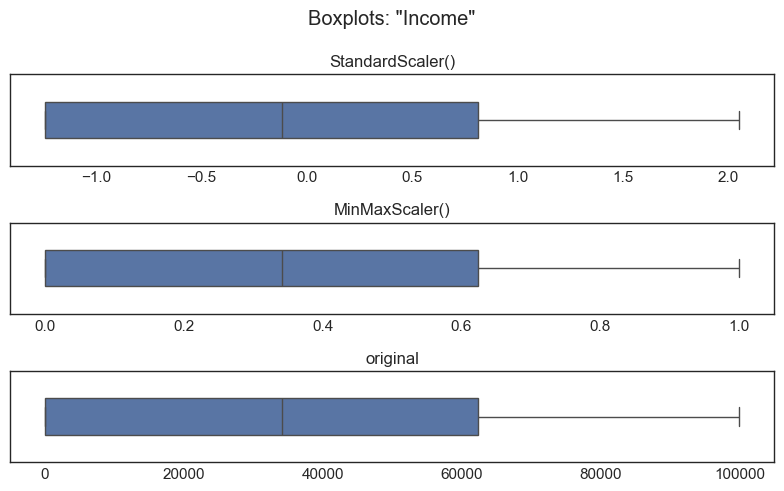

In [201]:
sns.set_style('white')

fig, axes = plt.subplots(3,1, figsize=(8,5), tight_layout=True,)

sns.boxplot(customer_cluster_df, x=bp_feat_l, ax=axes[2], width=.4)
sns.boxplot(df_minmax, x=bp_feat_l, ax=axes[1], width=.4)
sns.boxplot(df_standard, x=bp_feat_l, ax=axes[0], width=.4)

axes[0].set_title("StandardScaler()")
axes[0].set_xlabel(None)
axes[1].set_title("MinMaxScaler()")
axes[1].set_xlabel(None)
axes[2].set_title("original")
axes[2].set_xlabel(None)

plt.suptitle('Boxplots: "{}"'.format(bp_feat_l))

As we can see through the boxplots, MinMaxScaler forces the data into the 0-1 interval destroying the subtle differences in variance among average customers. This compression leads to clustering results that are less discriminatory.

StandardScaler preserves the relative distances between data points. This makes it ideal for the distance-based algorithms that we will use later, as it ensures that distances are calculated fairly and robustly across all features.

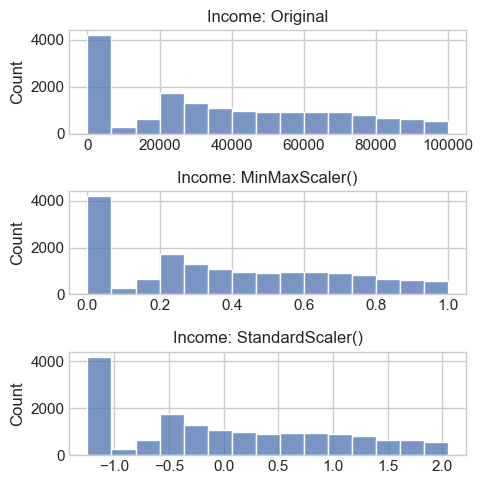

In [202]:
sns.set_style('whitegrid')

# Create subplots with 3 rows, 1 column:
fig, axes = plt.subplots(3,1, 
                         figsize=(5,5), tight_layout=True)

# Which feature do you want to visualize?
hp_feat = 'Income'

# common function args for histplot
hp_args = dict(x=hp_feat, bins=15)


sns.histplot(customer_cluster_df, ax=axes[0], **hp_args)
axes[0].set_title('{}: Original'.format(hp_feat))
axes[0].set_xlabel(None)

sns.histplot(df_minmax, ax=axes[1], **hp_args)
axes[1].set_title('{}: MinMaxScaler()'.format(hp_feat))
axes[1].set_xlabel(None)

sns.histplot(df_standard, ax=axes[2], **hp_args)
axes[2].set_title('{}: StandardScaler()'.format(hp_feat))
axes[2].set_xlabel(None)


plt.show()

sns.set()

We decided to keep the StandardScaler because it best preserved relative distances across features and provided the most suitable scaling for our clustering objectives.

In [203]:
customer_cluster_df = df_standard.copy()

In [204]:
sns.set()

### Outliers removal (DBSCAN)

We create a clean dataset using DBSCAN for K-Means training, ensuring that centroids are not distorted by extreme values. However, these outliers are saved in df_outliers for separate analysis, as they can also represent valuable customers.

In [ ]:
dbscan = DBSCAN(eps=1.65, min_samples=6, n_jobs=-1) # eps was later found using the K-Distance Graph for eps Selection
dbscan_labels = dbscan.fit_predict(customer_cluster_df[metric_features]) # ou features_modelo

outlier_count = Counter(dbscan_labels)
print(f"DBSCAN results: {outlier_count}")
print(f"Outliers detected (-1): {outlier_count[-1]}")
n_core = sum([count for label, count in outlier_count.items() if label != -1])
print(f"Core customers: {n_core}")

df_outliers = customer_cluster_df[dbscan_labels == -1].copy()

# data frame limpo para o kmeans
df_clean = customer[dbscan_labels != -1].copy()
# data frame limpo scaled para o kmeans
df_clean_scaled = customer_cluster_df[dbscan_labels != -1].copy()

print(f"\nWorking with {len(df_clean):,} core customers")
print(f"Outliers saved for later: {len(df_outliers)}")

DBSCAN results: Counter({np.int64(0): 16410, np.int64(-1): 164})
Outliers detected (-1): 164
Core customers: 16410

Working with 16,410 core customers
Outliers saved for later: 164


## Data Segmentation

### RFM Analysis

alterar M depois do feature engineering

To better understand customer behavior and identify meaningful subgroups, we applied an RFM (recency, frequency, monetary) segmentation model. This method classifies customers based on:
- Recency (R): how recently they flew;
- Frequency (F): how often they fly;
- Monetary (M): how much money they spend.

This allows us to highlight high-value customers, at-risk customers, and behavioral patterns relevant for targeted marketing strategies.

atencao: alterar depois monetary (atualmente é CLV, mas temos de mudar)

In [206]:
def create_rfm_quantiles(df, recency, frequency, monetary, rec_ascending=True, freq_ascending=False, mon_ascending=False):
    rfm_df = df.copy()

    rfm_df["R_quintile"] = pd.qcut(rfm_df[recency].rank(method="first", ascending = rec_ascending),
                                   q=5, labels=[1,2,3,4,5]
                                   ).astype(int)
    rfm_df["F_quintile"] = pd.qcut(rfm_df[frequency].rank(method="first", ascending = freq_ascending),
                                   q=5, labels=[1,2,3,4,5]
                                   ).astype(int)
    rfm_df["M_quintile"] = pd.qcut(rfm_df[monetary].rank(method="first", ascending = mon_ascending),
                                   q=5, labels=[1,2,3,4,5]
                                   ).astype(int)

    rfm_df["RFM_score"] = (rfm_df["R_quintile"].astype(str) + rfm_df["F_quintile"].astype(str) + rfm_df["M_quintile"].astype(str))

    return rfm_df


In [207]:
customer_rfm = create_rfm_quantiles(df_clean_scaled,recency="recency_months",frequency="NumFlights", monetary="Customer Lifetime Value", rec_ascending=True, freq_ascending=False, mon_ascending=False)
customer_rfm.head()

Income  Customer Lifetime Value  NumFlights  DistanceKM  \
9494  -0.779707                 2.353502   -1.755792   -1.756118   
10877  1.383990                -0.792510   -1.755792   -1.756118   
427   -0.312172                -0.490200   -1.755792   -1.756118   
7985  -1.243288                 0.053903   -1.755792   -1.756118   
11944  1.192490                -0.714534   -0.043547    0.790113   

       PointsAccumulated  PointsRedeemed  recency_months    Tenure  \
9494           -1.756077       -0.978957       -0.606190 -1.641869   
10877          -1.756077       -0.978957       -0.606190 -1.641869   
427            -1.756077       -0.978957       -0.606190 -1.641869   
7985           -1.756077       -0.978957       -0.606190 -1.641869   
11944           0.790185        0.089170       -0.021519 -1.641869   

       PointsUtilizationRate  CLVperflight  ...  oh_Vancouver  oh_Victoria  \
9494               -0.592971      7.074469  ...             0            0   
10877              -0.592971      0.518288  ...             0            0   
427                -0.592971      1.148291  ...             0            0   
7985               -0.592971      2.282184  ...             0            0   
11944              -0.132972     -0.250036  ...             0            0   

       oh_West Vancouver  oh_Whistler  oh_Whitehorse  oh_Winnipeg  R_quintile  \
9494                   0            0              0            0           1   
10877                  0            0              0            0           1   
427                    0            0              0            0           1   
7985                   0            0              0            0           1   
11944                  0            0              0            0           4   

       F_quintile  M_quintile  RFM_score  
9494            5           1        151  
10877           5           5        155  
427             5           4        154  
7985            5           2        152  
11944           4           5        445  

[5 rows x 64 columns]

Customer segmentation

We defined a set of business-driven RFM rules to map each customer into a meaningful segment.  
This includes groups such as:

| Segment                |  RFM  | Description                                                                 |  Marketing                                              |
|------------------------|-------------------|-----------------------------------------------------------------------------|-----------------------------------------------------------------------------|
| **High-value Loyal customers**          | 555               | Recently active, purchase frequently, and spend the most.                   | VIP programs, exclusive rewards, early access to new products.             |
| **Loyal Frequent customers**    | X5X               | High purchase frequency, even if not always recent.                         | Personalized offers, loyalty nurturing, regular engagement.                |
| **Big spenders**       | XX5               | Highest monetary contribution but not necessarily frequent or recent.       | Promote premium products, upselling opportunities.                         |
| **Potential Loyalists**| 515 / 525         | Recent high spenders with still low frequency.                               | Encourage repeat purchases with progressive discounts or subscriptions.    |
| **New customers**      | 511 / 512         | Recently acquired but with low spending and low frequency.                  | Welcome campaigns, onboarding flows, recurring purchase incentives.        |
| **At Risk customers**  | 155 / 255         | Previously high frequency and/or high spenders, but not recent.             | Re-engagement campaigns, special comeback offers.                          |
| **Lost customers**     | 155  | High-value customers who have been inactive for a long time.                | Aggressive recovery campaigns, personalized incentives.                    |
| **Lost Cheap customers** | 111             | Long inactive, low frequency, and low spending.                             | Avoid spending resources trying to reacquire.                              |
| **Others**             | Mixed             | Customers who don’t fit cleanly into the above priority groups.             | General marketing strategies depending on overall business goals.          |


In [208]:
def assign_segment(rfm):
        r, f, m = int(rfm[0]), int(rfm[1]), int(rfm[2])

        if r == 5 and f == 5 and m == 5:
            return "High-value Loyal customers"

        if f == 5 and not (r == 5 and m == 5):  
            return "Loyal Frequent customers"

        if m == 5 and not (r == 5 and f == 5):
            return "Big spenders"

        if r == 5 and m == 5 and f in [1, 2]:
            return "Potential Loyalists"

        if r == 5 and f == 1 and m in [1,2]:
            return "New customers"

        if (r in [1,2]) and f == 5 and m == 5:
            return "At Risk customers"

        if r == 1 and f == 5 and m == 5:
            return "Lost customers"

        if r == 1 and f == 1 and m == 1:
            return "Lost Cheap customers"

        return "Others"


RFM_segment
Others                        10258
Loyal Frequent customers       3194
Big spenders                   2628
New customers                   217
High-value Loyal customers       88
Lost Cheap customers             25
Name: count, dtype: int64

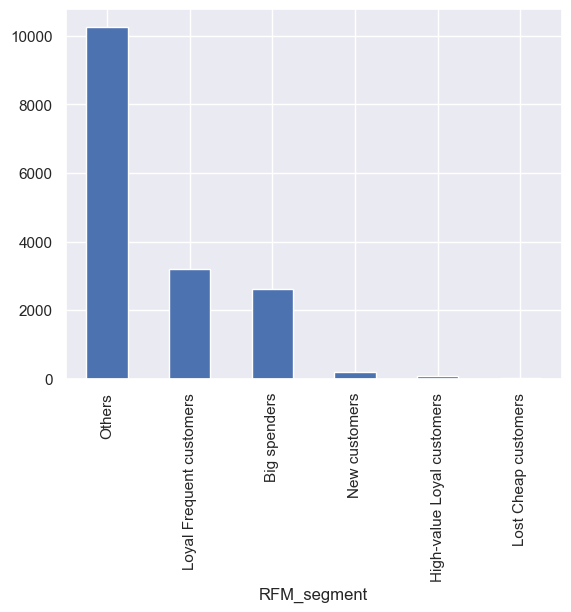

In [209]:
customer_rfm["RFM_segment"] = customer_rfm["RFM_score"].apply(assign_segment)
customer_rfm["RFM_segment"].value_counts().plot(kind="bar")
customer_rfm["RFM_segment"].value_counts()

The final distribution of segments highlights the behavioral diversity within the customer base.  
A larger presence of groups such as Loyal customers or Big spenders indicates strong retention and high engagement.  
Conversely, the proportion of At Risk or Lost customers reveals potential churn issues that may require dedicated retention strategies.

## Data Clustering

In [210]:
clustering_perspectives = {
    # Value-based segmentation: quem gera mais valor económico?
    "Value_Segmentation": [
        'Customer Lifetime Value',
        'Income',
        'DollarCostPointsRedeemed',
        'oh_Star',
        'oh_Nova',
        'oh_Standard'  # o professor disse que podemos +/- usar features ordinais mas para vermos se resulta em melhor ou pior
    ],

    # Behavioral segmentation: como os clientes se comportam nas viagens e no programa?
    "Behavioral_Segmentation": [
        'NumFlights',
        'NumFlightsWithCompanions',
        'DistanceKM',
        'PointsAccumulated',
        'PointsRedeemed',
        'PointsUtilizationRate',
        'recency_months',
        'Tenure'
    ],
}

In [211]:
# Demographic segmentation: quem são os clientes em termos de perfil socioeconómico?
Demographic_Segmentation = [
        'Country',
        'Province or State',
        'City',
        'Location Code',
        'Gender',
        'Education',
        'Marital Status'
]

### Multi-perspective segmentation

#### Value segmentation perspective

To ensure a robust segmentation, we will not rely solely on K-Means. 
We will compare it against Hierarchical Clustering to validate the number of clusters k and check if the customer groups have irregular shapes. The algorithm that best explains the variance R^2 of the data will be selected for the final profiling.

In [212]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [213]:
features_val = clustering_perspectives['Value_Segmentation']
df_value = df_clean_scaled[features_val].copy()
df_value

Customer Lifetime Value    Income  DollarCostPointsRedeemed  oh_Star  \
9494                  2.353502 -0.779707                 -0.978266        0   
10877                -0.792510  1.383990                 -0.978266        1   
427                  -0.490200 -0.312172                 -0.978266        1   
7985                  0.053903 -1.243288                 -0.978266        0   
11944                -0.714534  1.192490                  0.084570        1   
...                        ...       ...                       ...      ...   
7976                  0.050973 -1.243288                  0.038056        0   
13107                -0.436490 -0.440520                 -0.164278        1   
6173                 -0.437983  0.478834                 -0.227071        0   
11788                -0.748347  1.099852                 -0.268934        1   
7492                 -0.090233 -0.409224                 -0.978266        0   

       oh_Nova  oh_Standard  
9494         1            1  
10877        0            1  
427          0            1  
7985         1            1  
11944        0            1  
...        ...          ...  
7976         1            1  
13107        0            1  
6173         1            1  
11788        0            1  
7492         1            1  

[16410 rows x 6 columns]

In [214]:
kmeans = KMeans(
    init='k-means++',
    n_init=20,
    random_state=42
)

In [215]:
hierarchical = AgglomerativeClustering(
    metric='euclidean'
)

In [216]:
df_value_sample = df_value.sample(n=2000, random_state=42)

We used a subset of the data to determine the optimal number of clusters k and the best clustering approach, overcoming the constraints about calculating the distance matrix for the entire population.

In [217]:
r2_scores = {}

r2_scores['kmeans'] = func.get_r2_scores(df_value_sample, df_value.columns.tolist(), kmeans)

for linkage in ['complete', 'average', 'single', 'ward']: # 4 different versions of HC
    r2_scores[linkage] = func.get_r2_scores(
        df_value_sample,                 # data
        df_value.columns.tolist(),   # features of perspective
        # use HClust, changing the linkage at each iteration
        hierarchical.set_params(linkage=linkage) 
    )

c:\Users\Asus\anaconda3\envs\Fall2526\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.

c:\Users\Asus\anaconda3\envs\Fall2526\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.

c:\Users\Asus\anaconda3\envs\Fall2526\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.

c:\Users\Asus\anaconda3\envs\Fall2526\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

KMeans is known to have a memory leak o

In [218]:
r2_scores_df = pd.DataFrame(r2_scores)
r2_scores_df

kmeans  complete   average    single      ward
1  0.000000  0.000000  0.000000  0.000000  0.000000
2  0.226889  0.154048  0.091391  0.003522  0.178270
3  0.379657  0.314090  0.110245  0.006026  0.339533
4  0.517981  0.332696  0.112785  0.010032  0.467570
5  0.570112  0.342721  0.202152  0.015357  0.517836
6  0.612853  0.349960  0.280827  0.017056  0.563623
7  0.640588  0.496686  0.284851  0.020864  0.589528
8  0.663342  0.500091  0.304101  0.023265  0.615291

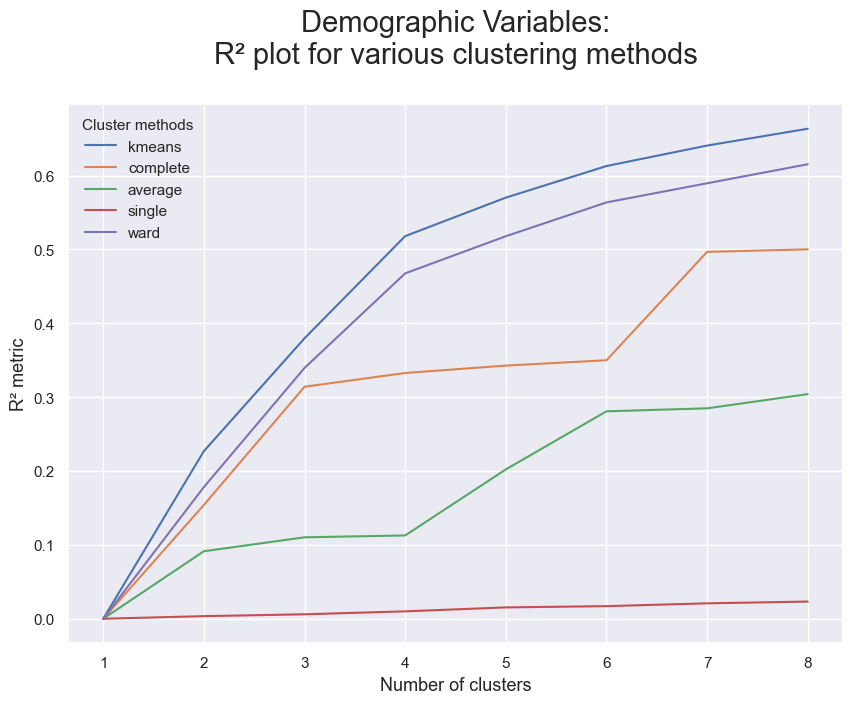

In [219]:
r2_scores_df.plot.line(figsize=(10,7))

plt.title("Demographic Variables:\nR² plot for various clustering methods\n", fontsize=21)
plt.legend(title="Cluster methods", title_fontsize=11)
plt.xlabel("Number of clusters", fontsize=13)
plt.ylabel("R² metric", fontsize=13)
plt.show()

The comparison identifies K-Means as the best algorithm for this dataset, since it achieves the highest R^2 scores across all cluster counts.
Analyzing the elbow of the curve reveals that 4 clusters is the optimal solution.

In [220]:
def visualize_silhouette(df, range_clusters=[2, 3, 4, 5, 6]):
    """
    Versão adaptada: Primeiro faz todos os prints dos scores, 
    depois mostra todos os gráficos.
    """
    
    # Lista para guardar os resultados temporariamente
    results_to_plot = []
    
    print(f"--- 1. A calcular Scores (Aguarde...) ---")
    
    # --- FASE 1: CÁLCULO E PRINTS ---
    for nclus in range_clusters:
        # 1. Correr K-Means
        clusterer = KMeans(n_clusters=nclus, init='k-means++', n_init=10, random_state=42)
        cluster_labels = clusterer.fit_predict(df)

        # 2. Calcular Score Médio
        silhouette_avg = silhouette_score(df, cluster_labels)
        
        # 3. PRINT IMEDIATO (Como pediste)
        print(f"Para n_clusters = {nclus}, o score médio é: {silhouette_avg:.4f}")
        
        # 4. Guardar dados para fazer o gráfico depois
        # Guardamos: (k, labels, score_medio)
        results_to_plot.append((nclus, cluster_labels, silhouette_avg))

    print("\n--- 2. A gerar os Gráficos de Silhueta... ---")
    
    # --- FASE 2: VISUALIZAÇÃO ---
    for nclus, cluster_labels, silhouette_avg in results_to_plot:
        
        # Criar a figura
        fig, ax1 = plt.subplots(1, 1)
        fig.set_size_inches(10, 6)

        # Configurar eixos
        ax1.set_xlim([-0.1, 1])
        ax1.set_ylim([0, len(df) + (nclus + 1) * 10])

        # Calcular scores individuais (necessário para as "facas")
        sample_silhouette_values = silhouette_samples(df, cluster_labels)

        y_lower = 10
        for i in range(nclus):
            # Agrupar scores do cluster i e ordenar
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / nclus)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Rotular o cluster
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10 

        ax1.set_title(f"Silhouette Plot para K = {nclus}")
        ax1.set_xlabel("Coeficiente de Silhueta")
        ax1.set_ylabel("Label do Cluster")

        # Linha vertical da média
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Limpar eixo Y
        plt.show()

In [221]:
df_sample_value_viz = df_value.sample(n=3000, random_state=42)

To optimize processing time, we will generate the Silhouette plot using a random subset of 3,000 customers.

--- 1. A calcular Scores (Aguarde...) ---


c:\Users\Asus\anaconda3\envs\Fall2526\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=12.



Para n_clusters = 2, o score médio é: 0.2339


c:\Users\Asus\anaconda3\envs\Fall2526\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=12.



Para n_clusters = 3, o score médio é: 0.2562


c:\Users\Asus\anaconda3\envs\Fall2526\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=12.



Para n_clusters = 4, o score médio é: 0.2624


c:\Users\Asus\anaconda3\envs\Fall2526\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=12.



Para n_clusters = 5, o score médio é: 0.2436


c:\Users\Asus\anaconda3\envs\Fall2526\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=12.



Para n_clusters = 6, o score médio é: 0.2372


c:\Users\Asus\anaconda3\envs\Fall2526\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=12.



Para n_clusters = 7, o score médio é: 0.2346


c:\Users\Asus\anaconda3\envs\Fall2526\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=12.



Para n_clusters = 8, o score médio é: 0.2354


c:\Users\Asus\anaconda3\envs\Fall2526\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=12.



Para n_clusters = 9, o score médio é: 0.2294


c:\Users\Asus\anaconda3\envs\Fall2526\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=12.



Para n_clusters = 10, o score médio é: 0.2394

--- 2. A gerar os Gráficos de Silhueta... ---


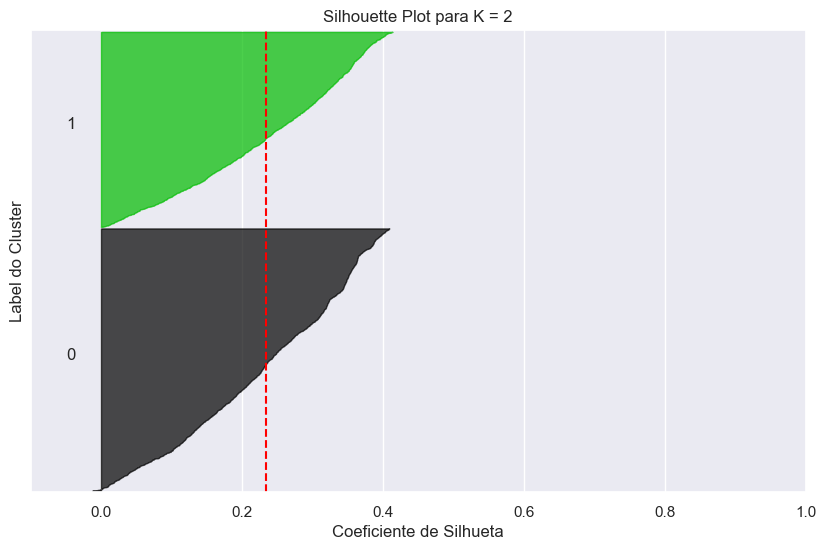

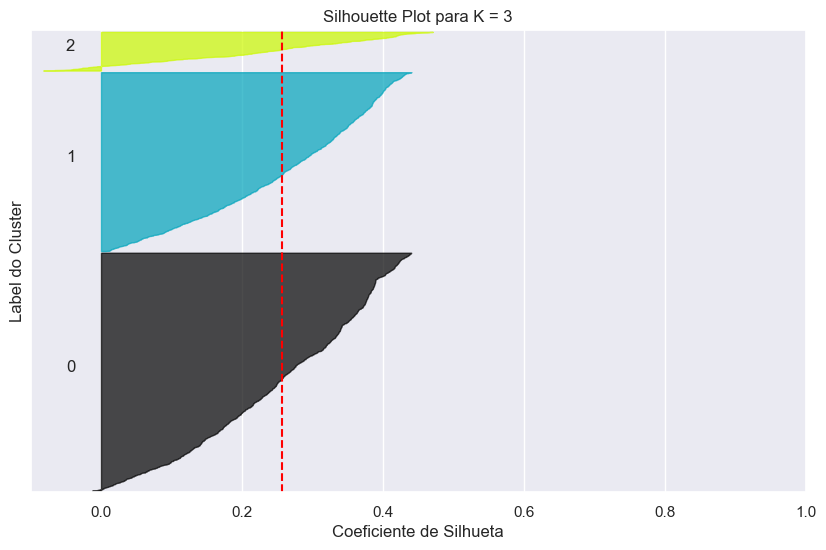

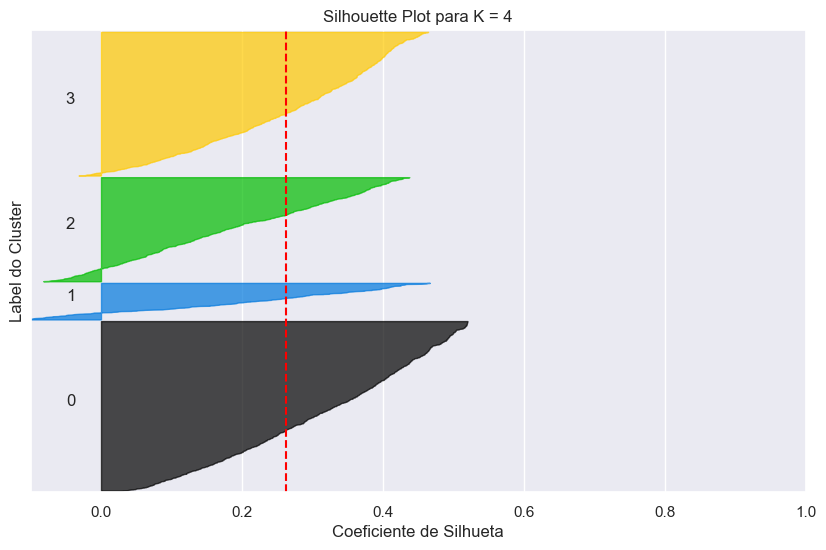

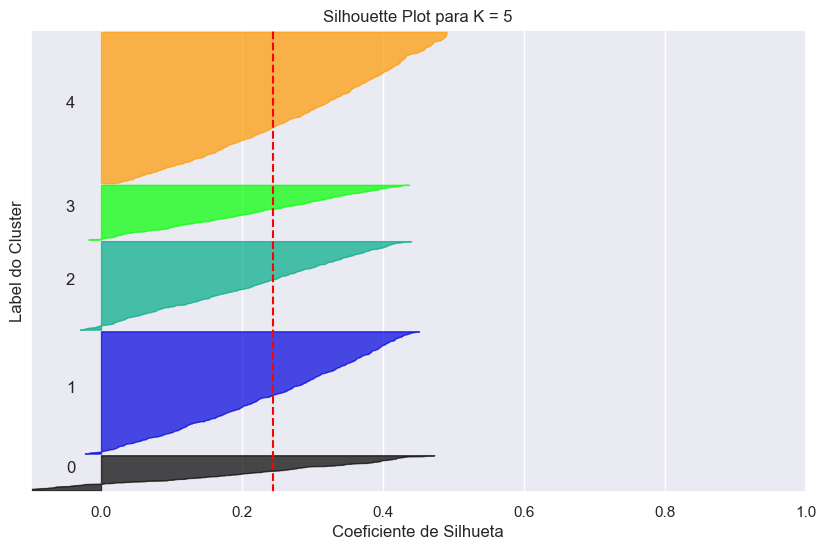

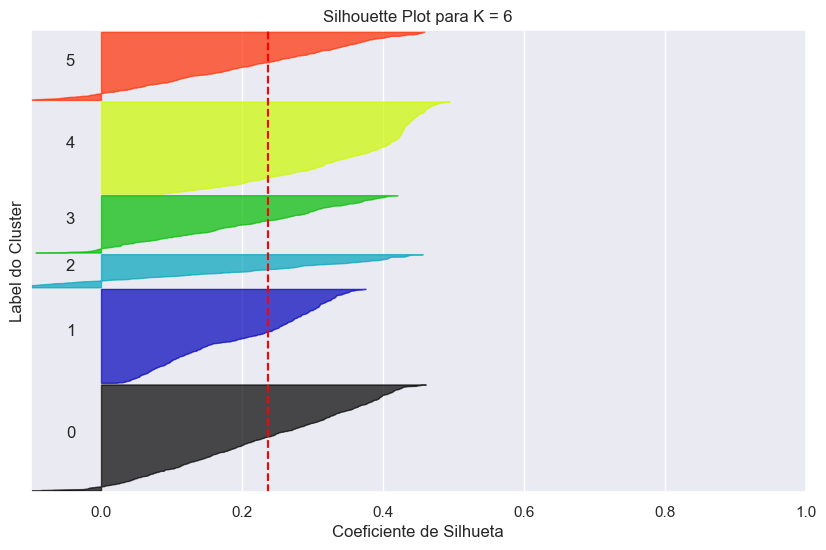

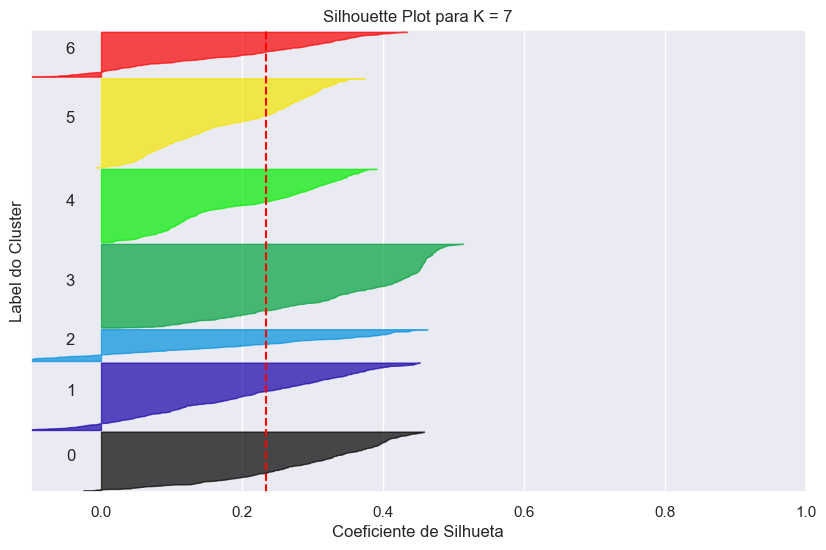

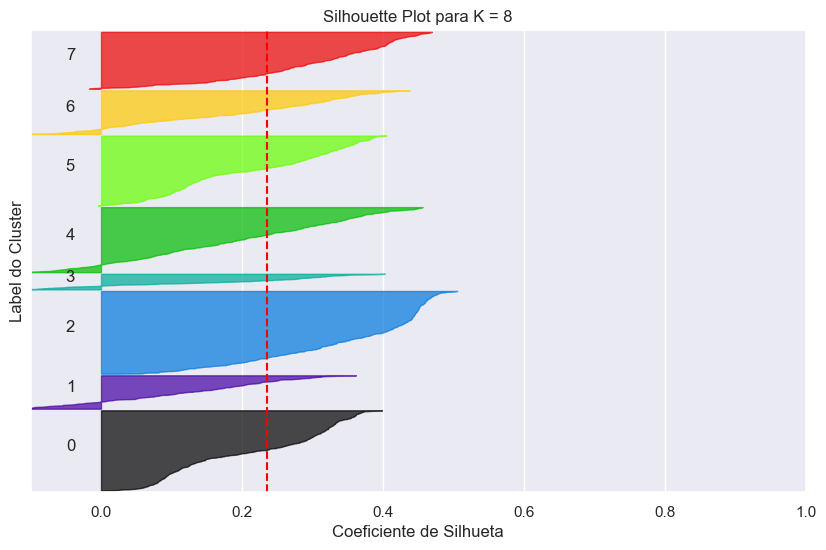

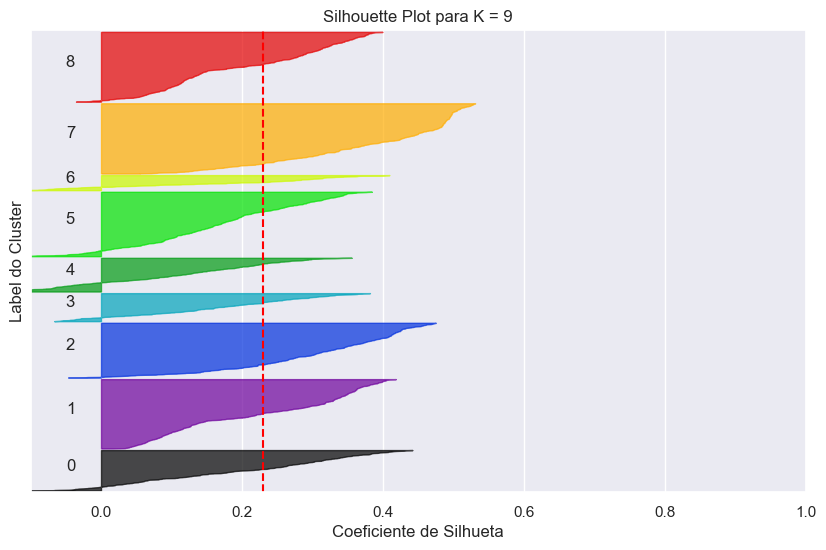

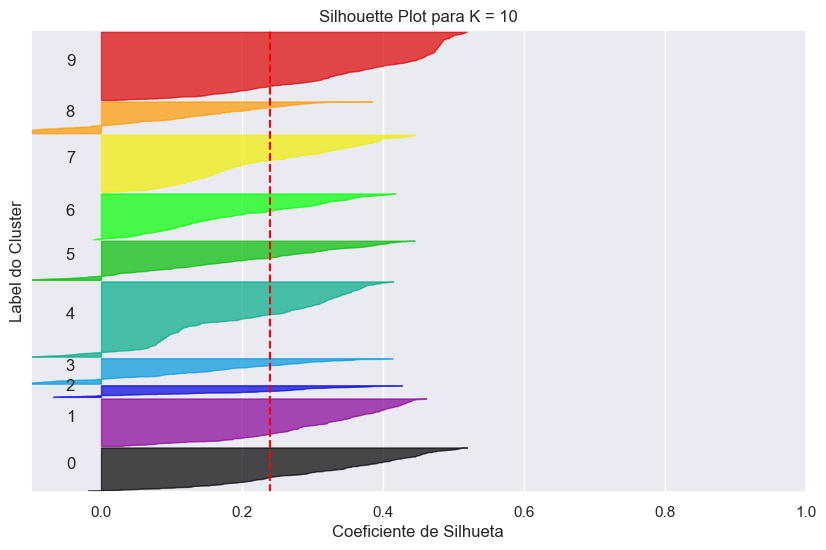

In [222]:
visualize_silhouette(df_sample_value_viz, range_clusters=range(2, 11))

The Silhouette Coefficient validates the findings from the previous variance analysis, as the metric reaches its global maximum at k=4 (Score: 0.2624). Since both the Elbow Method and the Silhouette Analysis converge on the same solution, we proceed with 4 clusters for this perspective.

#### Behavioral Segmentation perspective

In [223]:
features_behave = clustering_perspectives['Behavioral_Segmentation']
df_behave = df_clean_scaled[features_behave].copy()
df_behave

NumFlights  NumFlightsWithCompanions  DistanceKM  PointsAccumulated  \
9494    -1.755792                 -1.511359   -1.756118          -1.756077   
10877   -1.755792                 -1.511359   -1.756118          -1.756077   
427     -1.755792                 -1.511359   -1.756118          -1.756077   
7985    -1.755792                 -1.511359   -1.756118          -1.756077   
11944   -0.043547                 -0.883533    0.790113           0.790185   
...           ...                       ...         ...                ...   
7976     0.539885                 -0.031484    1.262061           1.262243   
13107    0.501835                 -0.031484   -0.046133          -0.046106   
6173     0.501835                 -0.210863    0.305457           0.305398   
11788    0.476469                 -0.210863   -0.114211          -0.114277   
7492    -1.755792                 -1.511359   -1.756118          -1.756077   

       PointsRedeemed  PointsUtilizationRate  recency_months    Tenure  
9494        -0.978957              -0.592971       -0.606190 -1.641869  
10877       -0.978957              -0.592971       -0.606190 -1.641869  
427         -0.978957              -0.592971       -0.606190 -1.641869  
7985        -0.978957              -0.592971       -0.606190 -1.641869  
11944        0.089170              -0.132972       -0.021519 -1.641869  
...               ...                    ...             ...       ...  
7976         0.055360              -0.217197       -0.313854  1.785661  
13107       -0.170157              -0.074309       -0.313854  1.787053  
6173        -0.232832              -0.196083       -0.313854  1.788445  
11788       -0.276302              -0.123669       -0.313854  1.788445  
7492        -0.978957              -0.592971       -0.606190  1.788445  

[16410 rows x 8 columns]

In [224]:
df_behave_sample = df_behave.sample(n=2000, random_state=42)

In [225]:
r2_scores_behave = {}

r2_scores_behave['kmeans'] = func.get_r2_scores(df_behave_sample, df_behave.columns.tolist(), kmeans)

for linkage in ['complete', 'average', 'single', 'ward']: # 4 different versions of HC
    r2_scores_behave[linkage] = func.get_r2_scores(
        df_behave_sample,                 # data
        df_behave.columns.tolist(),   # features of perspective
        # use HClust, changing the linkage at each iteration
        hierarchical.set_params(linkage=linkage) 
    )

c:\Users\Asus\anaconda3\envs\Fall2526\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.

c:\Users\Asus\anaconda3\envs\Fall2526\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.

c:\Users\Asus\anaconda3\envs\Fall2526\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.

c:\Users\Asus\anaconda3\envs\Fall2526\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

KMeans is known to have a memory leak o

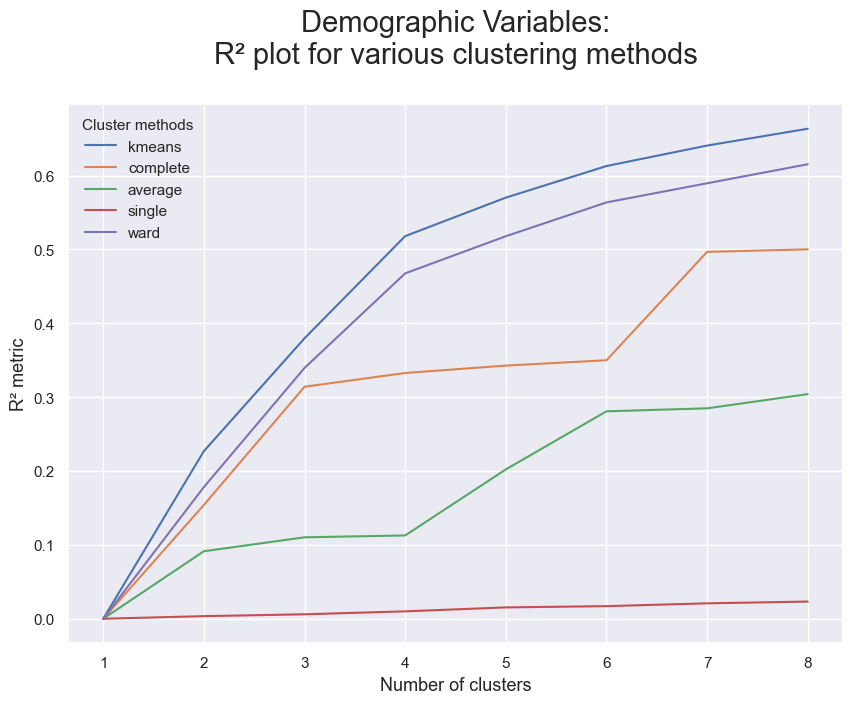

In [226]:
r2_scores_df_behave = pd.DataFrame(r2_scores)

r2_scores_df_behave.plot.line(figsize=(10,7))

plt.title("Demographic Variables:\nR² plot for various clustering methods\n", fontsize=21)
plt.legend(title="Cluster methods", title_fontsize=11)
plt.xlabel("Number of clusters", fontsize=13)
plt.ylabel("R² metric", fontsize=13)
plt.show()

The comparison of clustering algorithms reveals that K-Means outperforms other methods, achieving the highest explained variance across all k values. Regarding the number of clusters, we identify a elbow at k=4. The model explains mora then 50% of the behavioral variance at this point.

In [227]:
df_sample_behave_viz = df_behave.sample(n=3000, random_state=42)

To optimize processing time, we will generate the Silhouette plot using a random subset of 3,000 customers.

--- 1. A calcular Scores (Aguarde...) ---


c:\Users\Asus\anaconda3\envs\Fall2526\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=12.



Para n_clusters = 2, o score médio é: 0.4505


c:\Users\Asus\anaconda3\envs\Fall2526\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=12.



Para n_clusters = 3, o score médio é: 0.4676


c:\Users\Asus\anaconda3\envs\Fall2526\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=12.



Para n_clusters = 4, o score médio é: 0.3063


c:\Users\Asus\anaconda3\envs\Fall2526\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=12.



Para n_clusters = 5, o score médio é: 0.2758


c:\Users\Asus\anaconda3\envs\Fall2526\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=12.



Para n_clusters = 6, o score médio é: 0.2808


c:\Users\Asus\anaconda3\envs\Fall2526\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=12.



Para n_clusters = 7, o score médio é: 0.2712


c:\Users\Asus\anaconda3\envs\Fall2526\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=12.



Para n_clusters = 8, o score médio é: 0.2782


c:\Users\Asus\anaconda3\envs\Fall2526\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=12.



Para n_clusters = 9, o score médio é: 0.2712


c:\Users\Asus\anaconda3\envs\Fall2526\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=12.



Para n_clusters = 10, o score médio é: 0.2673

--- 2. A gerar os Gráficos de Silhueta... ---


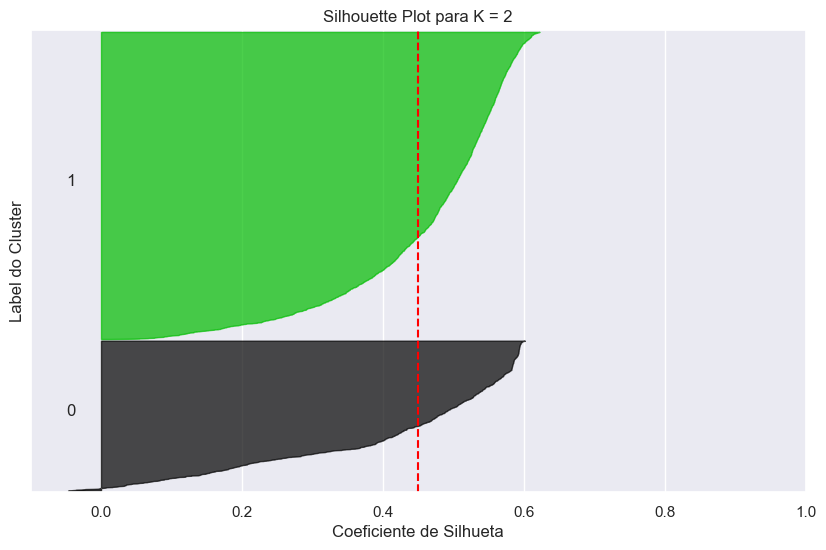

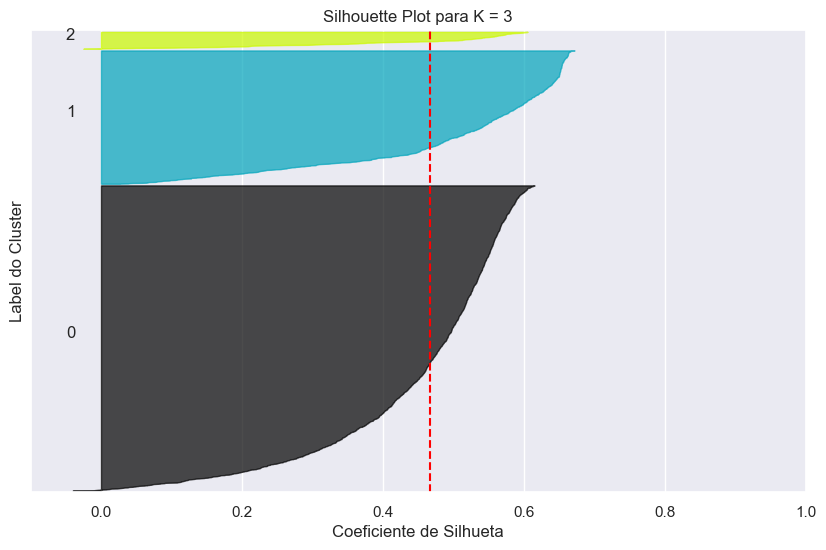

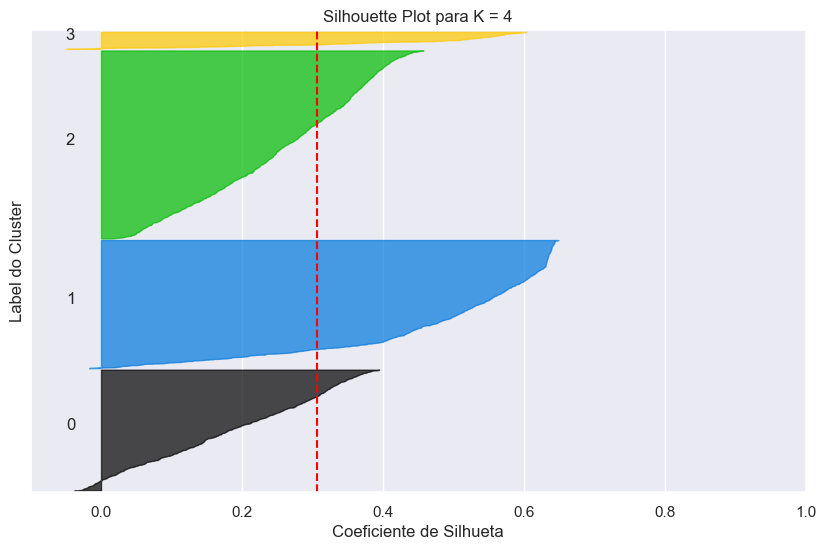

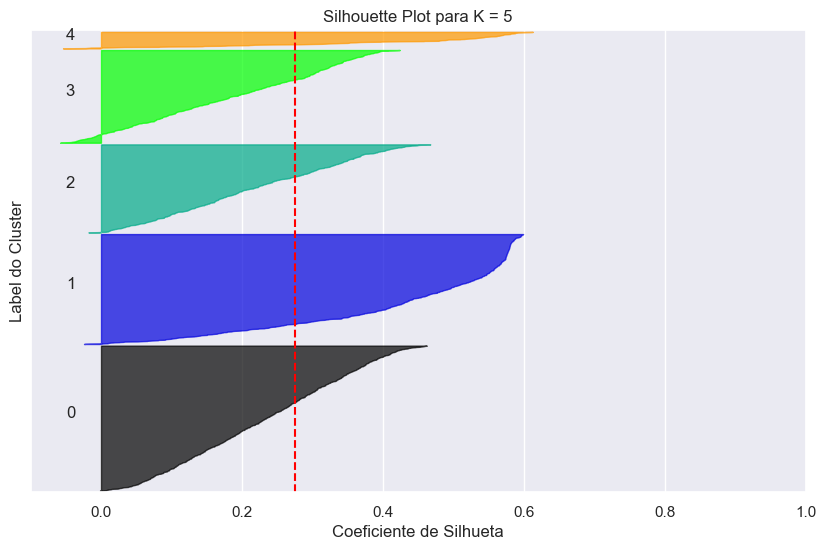

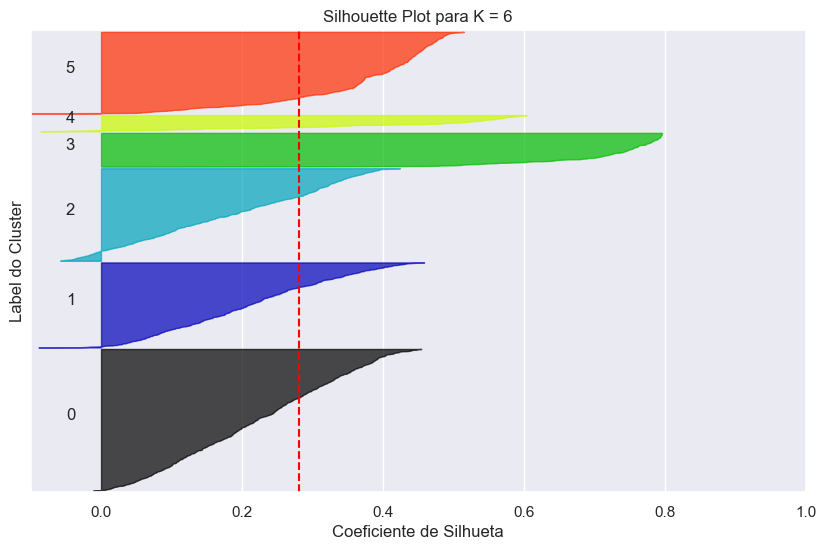

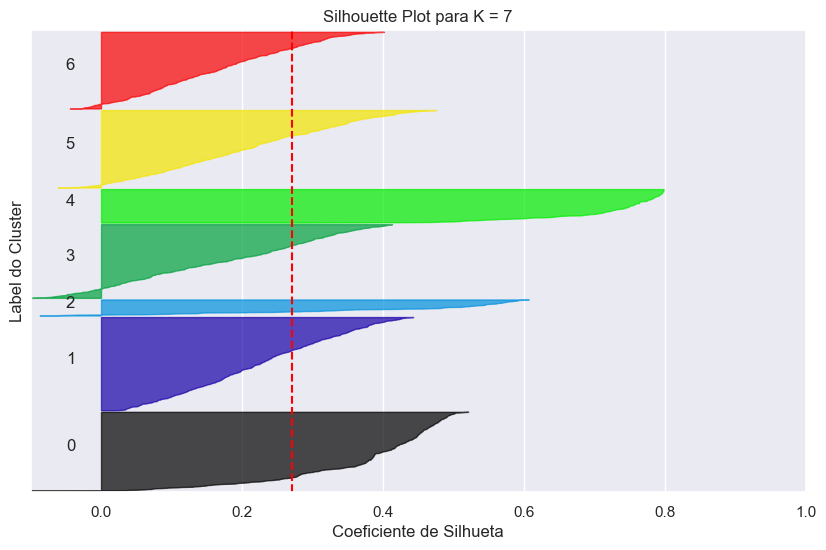

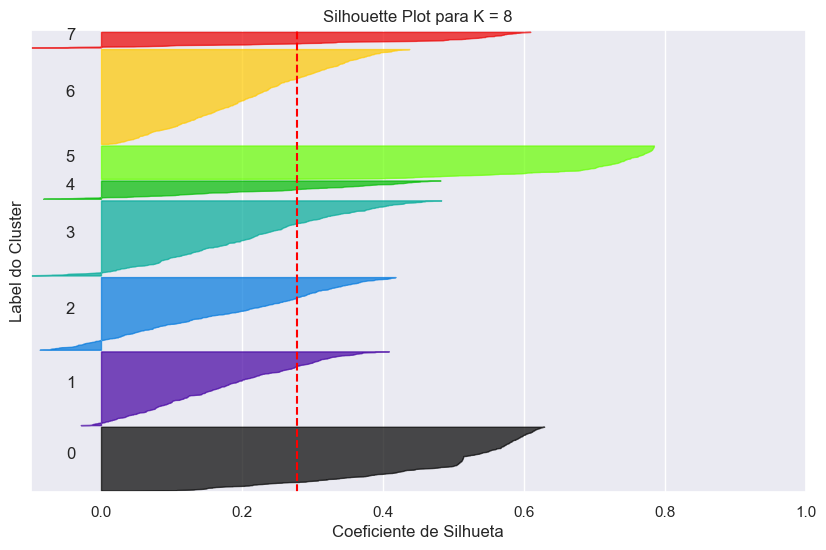

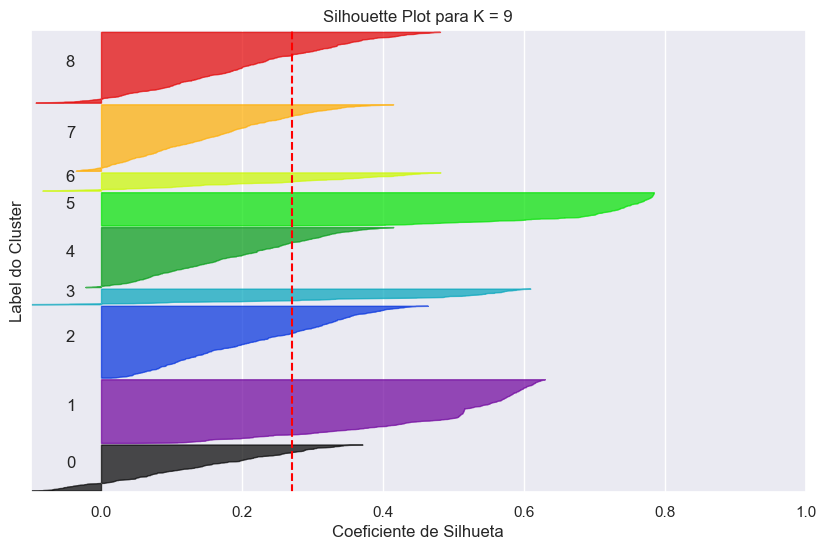

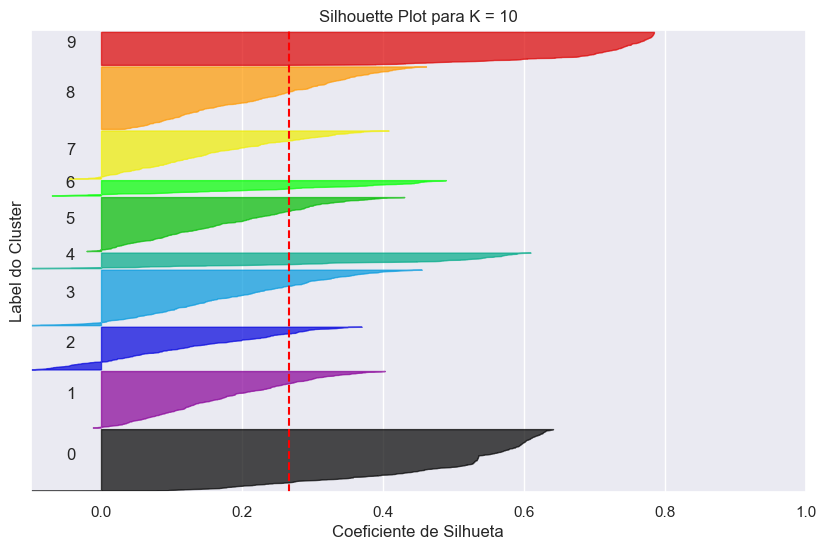

In [228]:
visualize_silhouette(df_sample_behave_viz, range_clusters=range(2, 11))

While k=3 maximizes mathematical separation, we selected k=4, since its Silhouette score (0.31) remains statistically valid, and we can visually confirm cohesive segments with minimal misclassification.

#### Solution

In [229]:

kmeans_value = KMeans(
    n_clusters=4,
    init='k-means++',
    n_init=20,
    random_state=42
)
value_labels = kmeans_value.fit_predict(df_value)
value_labels

array([3, 2, 1, ..., 2, 2, 1], dtype=int32)

In [230]:
df_clean_scaled['value_cluster'] = value_labels

In [231]:
kmeans_behave = KMeans(
    n_clusters=4,
    init='k-means++',
    n_init=20,
    random_state=42
)
behave_labels = kmeans_behave.fit_predict(df_behave)
behave_labels

array([3, 3, 3, ..., 0, 0, 3], dtype=int32)

In [232]:
df_clean_scaled['behavioral_cluster'] = behave_labels

In [233]:
print(f"Behavioral clusters: {df_clean_scaled['value_cluster'].nunique()}")
print(f"Preference clusters: {df_clean_scaled['behavioral_cluster'].nunique()}")

Behavioral clusters: 4
Preference clusters: 4


In [234]:
crosstab = pd.crosstab(df_clean_scaled['value_cluster'], df_clean_scaled['behavioral_cluster'])
crosstab

behavioral_cluster     0    1     2     3
value_cluster                            
0                    288   31  3062    58
1                   3365  351   357  2376
2                   2613  233   591  1731
3                    619   37   302   396

reavaliar os graficos seguintes apos o features selection

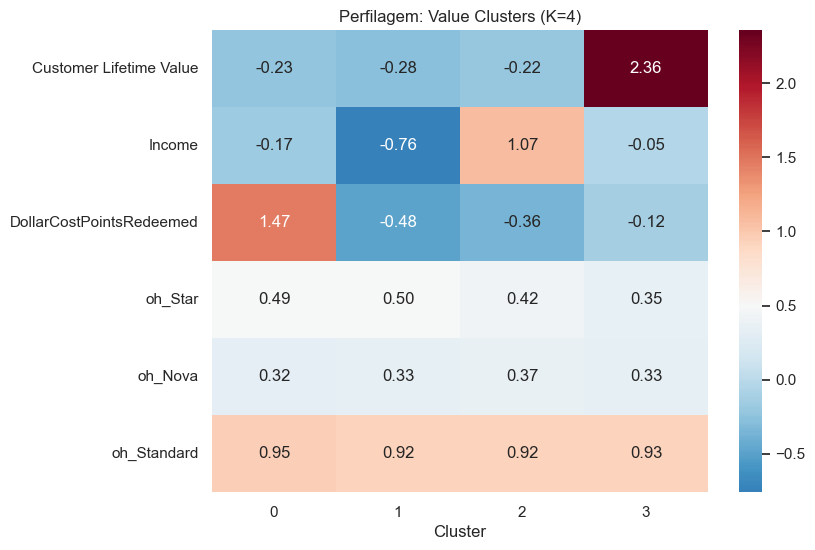

In [235]:
cols_value = df_value.columns.tolist() 
temp_df = df_clean_scaled[cols_value].copy()
temp_df['Cluster'] = df_clean_scaled['value_cluster']

# Agrupar e calcular média
profile_value = temp_df.groupby('Cluster').mean().T

# Desenhar
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(profile_value, center=0.5, annot=True, cmap="RdBu_r", fmt=".2f", ax=ax)
ax.set_title("Perfilagem: Value Clusters (K=4)")
plt.show()

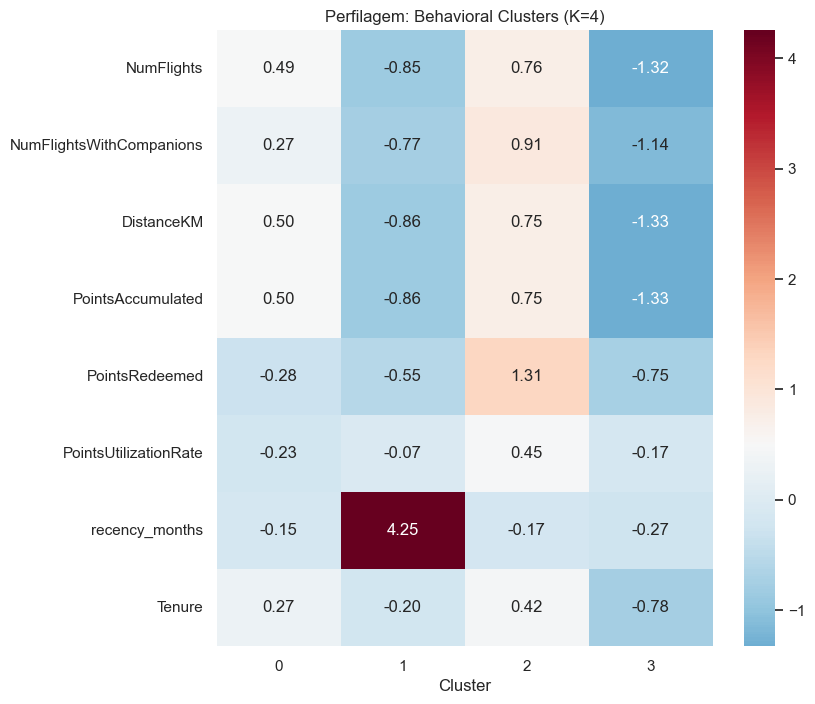

In [236]:
cols_behave = df_behave.columns.tolist()
temp_df_b = df_clean_scaled[cols_behave].copy()
temp_df_b['Cluster'] = df_clean_scaled['behavioral_cluster']

# Agrupar e calcular média
profile_behave = temp_df_b.groupby('Cluster').mean().T

# Desenhar
fig, ax = plt.subplots(figsize=(8, 8)) # Mais alto porque deve ter mais variáveis
sns.heatmap(profile_behave, center=0.5, annot=True, cmap="RdBu_r", fmt=".2f", ax=ax)
ax.set_title("Perfilagem: Behavioral Clusters (K=4)")
plt.show()

### Density-based methods

#### Mean-shift

#### DBSCAN

alterar o n_neighbors depois do feature selection

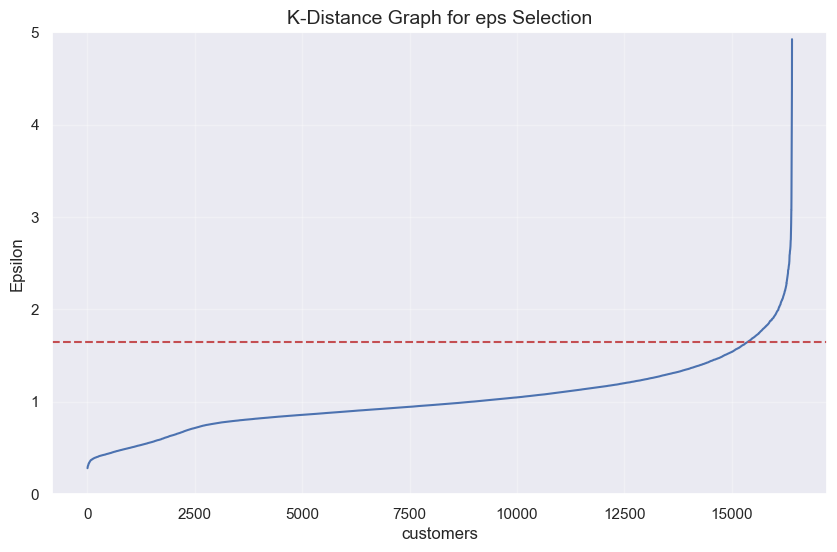

In [237]:
neigh = NearestNeighbors(n_neighbors=24) #2* nr de features
neigh.fit(df_clean_scaled[metric_features])
distances, _ = neigh.kneighbors(df_clean_scaled[metric_features])

# Ordenar e plotar
distances = np.sort(distances[:, -1], axis=0)

plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.title('K-Distance Graph for eps Selection', fontsize=14)
plt.xlabel('customers')
plt.ylabel('Epsilon')
plt.grid(True, alpha=0.3)
plt.axhline(y=1.65, color='r', linestyle='--', label='Potential eps (elbow)')
plt.ylim(0, 5)
plt.show()

In [238]:
dbscan = DBSCAN(eps=1.65, min_samples=24, n_jobs=-1)

dbscan_labels = dbscan.fit_predict(df_clean_scaled[metric_features])

In [239]:
np.unique(dbscan_labels)

array([-1,  0])

In [240]:
df_concat = pd.concat([df_clean_scaled[metric_features], pd.Series(dbscan_labels, index=df_clean_scaled.index, name="dbscan_labels")], axis=1)
df_concat

Income  Customer Lifetime Value  NumFlights  DistanceKM  \
9494  -0.779707                 2.353502   -1.755792   -1.756118   
10877  1.383990                -0.792510   -1.755792   -1.756118   
427   -0.312172                -0.490200   -1.755792   -1.756118   
7985  -1.243288                 0.053903   -1.755792   -1.756118   
11944  1.192490                -0.714534   -0.043547    0.790113   
...         ...                      ...         ...         ...   
7976  -1.243288                 0.050973    0.539885    1.262061   
13107 -0.440520                -0.436490    0.501835   -0.046133   
6173   0.478834                -0.437983    0.501835    0.305457   
11788  1.099852                -0.748347    0.476469   -0.114211   
7492  -0.409224                -0.090233   -1.755792   -1.756118   

       PointsAccumulated  PointsRedeemed  recency_months    Tenure  \
9494           -1.756077       -0.978957       -0.606190 -1.641869   
10877          -1.756077       -0.978957       -0.606190 -1.641869   
427            -1.756077       -0.978957       -0.606190 -1.641869   
7985           -1.756077       -0.978957       -0.606190 -1.641869   
11944           0.790185        0.089170       -0.021519 -1.641869   
...                  ...             ...             ...       ...   
7976            1.262243        0.055360       -0.313854  1.785661   
13107          -0.046106       -0.170157       -0.313854  1.787053   
6173            0.305398       -0.232832       -0.313854  1.788445   
11788          -0.114277       -0.276302       -0.313854  1.788445   
7492           -1.756077       -0.978957       -0.606190  1.788445   

       PointsUtilizationRate  CLVperflight  DollarCostPointsRedeemed  \
9494               -0.592971      7.074469                 -0.978266   
10877              -0.592971      0.518288                 -0.978266   
427                -0.592971      1.148291                 -0.978266   
7985               -0.592971      2.282184                 -0.978266   
11944              -0.132972     -0.250036                  0.084570   
...                      ...           ...                       ...   
7976               -0.217197     -0.243013                  0.038056   
13107              -0.074309     -0.248455                 -0.164278   
6173               -0.196083     -0.248473                 -0.227071   
11788              -0.123669     -0.252031                 -0.268934   
7492               -0.592971      1.981809                 -0.978266   

       NumFlightsWithCompanions  dbscan_labels  
9494                  -1.511359              0  
10877                 -1.511359              0  
427                   -1.511359              0  
7985                  -1.511359              0  
11944                 -0.883533              0  
...                         ...            ...  
7976                  -0.031484              0  
13107                 -0.031484              0  
6173                  -0.210863              0  
11788                 -0.210863              0  
7492                  -1.511359              0  

[16410 rows x 13 columns]

In [241]:
df_concat['dbscan_labels'].value_counts().sort_index()

dbscan_labels
-1      219
 0    16191
Name: count, dtype: int64

In [247]:
df_clean_scaled['dbscan_labels'] = dbscan_labels
r2_db = func.get_rsq(df_clean_scaled, metric_features, 'dbscan_labels')
print(f"DBSCAN R² score: {r2_db:.4f}")

DBSCAN R² score: 0.0107


As we can see through these results, DBSCAN produced a solution with a single cluster containing mora than 98% of the customers and a very low R^2. The algorithm failed to identify distinct behavioral groups because the data is continuous and has no low-density separation regions. This result validates the use of DBSCAN only as an outlier detection step, as we did earlier, rather than a segmentation tool.

#### HDBSCAN

In [244]:
hdb = HDBSCAN(
    min_cluster_size=200, 
    min_samples=24,       
    metric='euclidean',
    cluster_selection_method='eom' 
)

hdb_labels = hdb.fit_predict(df_clean_scaled)
results_df = df_clean_scaled.copy()
results_df["Cluster_HDBSCAN"] = hdb_labels

#  label -1 --> ruído
print(results_df["Cluster_HDBSCAN"].value_counts().sort_index())

Cluster_HDBSCAN
-1    10991
 0     2765
 1     1895
 2      759
Name: count, dtype: int64


Since the primary business objective is to create a comprehensive marketing strategy that covers the entire customer base, leaving more than 60% of customers unsegmented is not a viable option (cluster -1). Therefore, we conclude that a density-based approach (HDBSCAN) is not suitable for our dataset.